In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://blog.csdn.net/qq_45425321/article/details/105351095?depth_1-utm_source=distribute.pc_feed.166455&utm_source=distribute.pc_feed.166455

In [2]:
#时间的几种表达方式：2016 Jul 1 ，7/1/2016，2016-07-01，2016/07/01
rng = pd.date_range('2016/07/01',periods=10,freq='D')#频率默认按天加，3D就3天加
#这里也用(起始时间、终止时间、频率）的方式创建，
rng


DatetimeIndex(['2016-07-01', '2016-07-02', '2016-07-03', '2016-07-04',
               '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08',
               '2016-07-09', '2016-07-10'],
              dtype='datetime64[ns]', freq='D')

将时间作为索引，这样方便之后通过时间就拿出数据或者对数据进行切片

In [3]:
time = pd.Series(np.random.randn(10),index = pd.date_range("2016-1-1",periods=10))
time

2016-01-01    0.844011
2016-01-02   -0.442791
2016-01-03   -0.055209
2016-01-04   -1.617359
2016-01-05   -0.102980
2016-01-06    1.562037
2016-01-07   -2.176163
2016-01-08   -1.713402
2016-01-09   -0.364661
2016-01-10    0.725489
Freq: D, dtype: float64

truncate过滤
before这里2016-1-3之前的数据都不要了，也可以用after操作。

In [4]:
time.truncate(before='2016-1-5')

2016-01-05   -0.102980
2016-01-06    1.562037
2016-01-07   -2.176163
2016-01-08   -1.713402
2016-01-09   -0.364661
2016-01-10    0.725489
Freq: D, dtype: float64

时间戳的指定：

In [5]:
print(pd.Timestamp("2016-07-1"))
print(pd.Timestamp("2016-07-1 10"))
print(pd.Timestamp("2016-07-1 10:15:1"))

2016-07-01 00:00:00
2016-07-01 10:00:00
2016-07-01 10:15:01


时间区间的指定：

In [6]:
pd.Period("2016-07")

Period('2016-07', 'M')

In [7]:
pd.Period("2016-07-1 10:5:1")

Period('2016-07-01 10:05:01', 'S')

时间加减：

In [8]:
pd.Timestamp('2016-01-01 10:10')+pd.Timedelta('1 day')

Timestamp('2016-01-02 10:10:00')

时间戳和时间周期的转换及区别

In [9]:
ts = pd.Series(range(10),pd.date_range('07-10-16 8:00',periods=10,freq='H'))
ts_period = ts.to_period()
ts_period

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
2016-07-10 12:00    4
2016-07-10 13:00    5
2016-07-10 14:00    6
2016-07-10 15:00    7
2016-07-10 16:00    8
2016-07-10 17:00    9
Freq: H, dtype: int64

In [10]:
print(ts_period['2016-07-10 08:30':'2016-07-10 11:45'])
print('————————')
print(ts['2016-07-10 08:30':'2016-07-10 11:45']) 

2016-07-10 08:00    0
2016-07-10 09:00    1
2016-07-10 10:00    2
2016-07-10 11:00    3
Freq: H, dtype: int64
————————
2016-07-10 09:00:00    1
2016-07-10 10:00:00    2
2016-07-10 11:00:00    3
Freq: H, dtype: int64


## 二、数据重采样 （多角度多维度分析数据）
## 时间数据由一个频率转换到另外一个频率。例如将天变换为月，为降采样。降月变为天，为升采样。
## 这里重采样直接使用resample操作
## 1.升采样

In [11]:

rng = pd.date_range("1/1/2011",periods=90,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
print(ts.head())


2011-01-01   -0.590679
2011-01-02    0.200763
2011-01-03    0.974297
2011-01-04    0.790562
2011-01-05    0.087330
Freq: D, dtype: float64


### 可以按月展示和，也可mean展示均值

In [12]:
print(ts.resample('M').sum())


2011-01-31   -5.776455
2011-02-28    0.714342
2011-03-31    4.475984
Freq: M, dtype: float64


In [13]:
print(ts.resample('3D').sum().head())

2011-01-01    0.584381
2011-01-04    2.138666
2011-01-07   -0.875211
2011-01-10   -1.572117
2011-01-13   -0.705890
Freq: 3D, dtype: float64


### 升采样比如3天综合数据扩展为每天的数据，会造成空值，这时就需要指定升采样策略了，插值填充。

In [14]:
day3Ts = ts.resample('3D').mean()
print(day3Ts.resample('D').asfreq().head(6))

2011-01-01    0.194794
2011-01-02         NaN
2011-01-03         NaN
2011-01-04    0.712889
2011-01-05         NaN
2011-01-06         NaN
Freq: D, dtype: float64


## 1.2升采样插值方法： ffill（空值取前面的值）、bfill（空值取后面的值）、interpolate(线性取值)

### 前值填充，只对一个值填充

In [15]:
print(day3Ts.resample('D').ffill(1).head(6))

2011-01-01    0.194794
2011-01-02    0.194794
2011-01-03         NaN
2011-01-04    0.712889
2011-01-05    0.712889
2011-01-06         NaN
Freq: D, dtype: float64


### 前值填充，两个值都填充

In [16]:
print(day3Ts.resample('D').ffill(2).head(6))

2011-01-01    0.194794
2011-01-02    0.194794
2011-01-03    0.194794
2011-01-04    0.712889
2011-01-05    0.712889
2011-01-06    0.712889
Freq: D, dtype: float64


### 后值填充

In [17]:
print(day3Ts.resample('D').bfill(2).head(6))

2011-01-01    0.194794
2011-01-02    0.712889
2011-01-03    0.712889
2011-01-04    0.712889
2011-01-05   -0.291737
2011-01-06   -0.291737
Freq: D, dtype: float64


### 线性拟合填充，将原始点连线，然后线上取点插值

In [18]:
print(day3Ts.resample('D').interpolate('linear').head())

2011-01-01    0.194794
2011-01-02    0.367492
2011-01-03    0.540190
2011-01-04    0.712889
2011-01-05    0.378013
Freq: D, dtype: float64


### 假设有一份数据(2016~2017年365天365个点)，现在想了解2016/2/5情况，拿出这个点的数据可对其进行描述，但这样太绝对有误差，可以拿2.1-2.10的数据取平均值来描述。这样更加科学，尤其是在进行预测时。我们可以基于这样一个窗口取平均，使值更加平稳。**滑动窗口**：指定窗口尺寸，计算时根据待求值对窗口进行单位距离滑动。

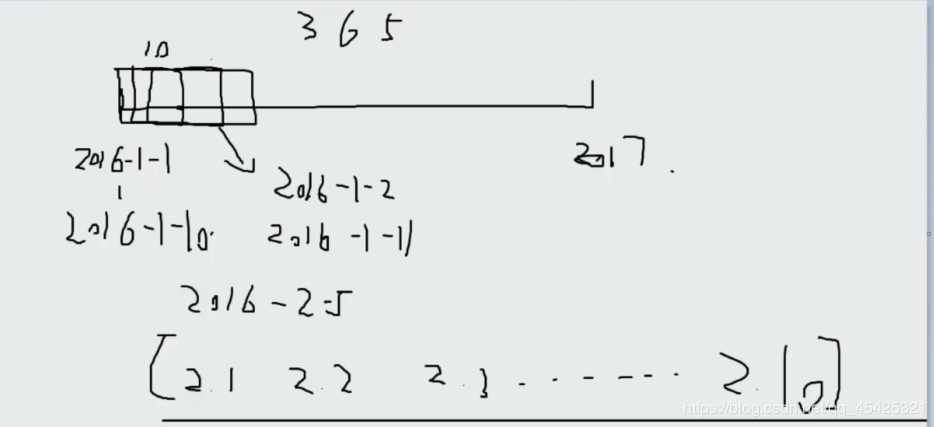

# 构造数据

In [19]:
df = pd.Series(np.random.randn(600),index= pd.date_range('7/1/2016',freq='D',periods = 600))
print(df.head())

2016-07-01    1.144035
2016-07-02    0.747570
2016-07-03   -1.567639
2016-07-04   -2.200593
2016-07-05   -0.269736
Freq: D, dtype: float64


# 构造滑动窗口(指定窗口大小)

In [20]:
r = df.rolling(window = 10)
print(r)

Rolling [window=10,center=False,axis=0]


# 指定窗口计算方式

In [21]:
print(r.mean().head(15)) #在长度为10的窗口上计算均值

2016-07-01         NaN
2016-07-02         NaN
2016-07-03         NaN
2016-07-04         NaN
2016-07-05         NaN
2016-07-06         NaN
2016-07-07         NaN
2016-07-08         NaN
2016-07-09         NaN
2016-07-10   -0.352419
2016-07-11   -0.567773
2016-07-12   -0.716856
2016-07-13   -0.726378
2016-07-14   -0.532068
2016-07-15   -0.474787
Freq: D, dtype: float64


<AxesSubplot:>

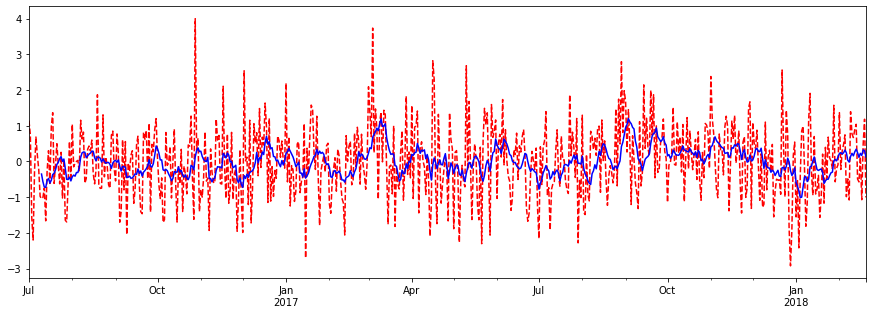

In [22]:
%matplotlib inline
plt.figure(figsize=(15,5)) #指定绘图尺寸
df.plot(style='r--') #原始数据用红色虚线展示
df.rolling(window = 10).mean().plot(style='b') #窗口滑动计算数据，用蓝色实线展示


# 四、ARIMA模型
# 4.1 数据平稳性与差分法
# ARIMA模型=AR+I+MA，应用：如现在拿到股票数据，根据其历史变化情况预测其未来变化。
# 拿到的数据可能千奇百怪，需要有迹可循才能预测，因此要求这些序列有惯性。

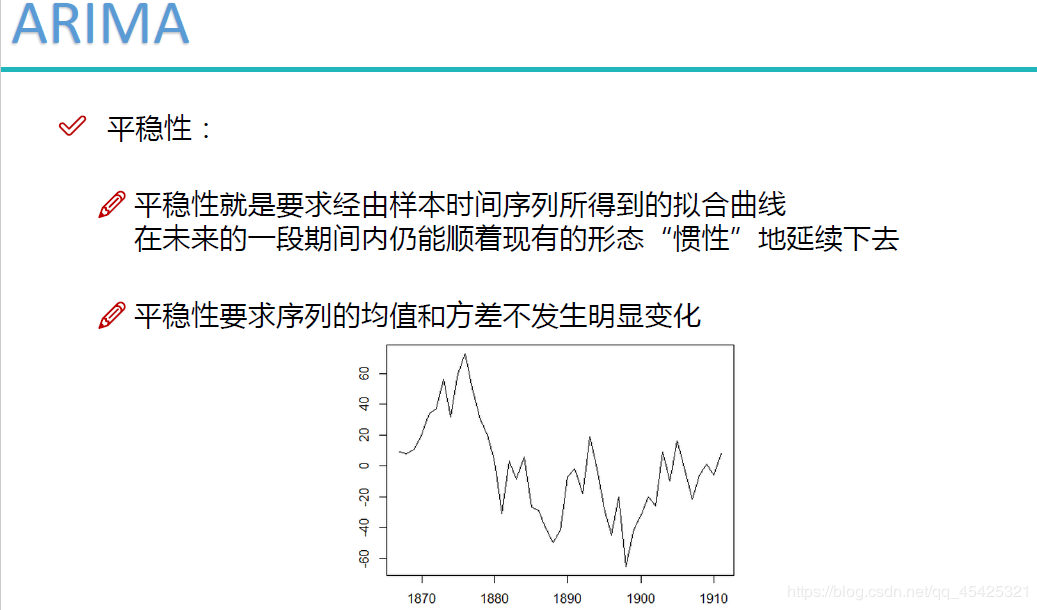

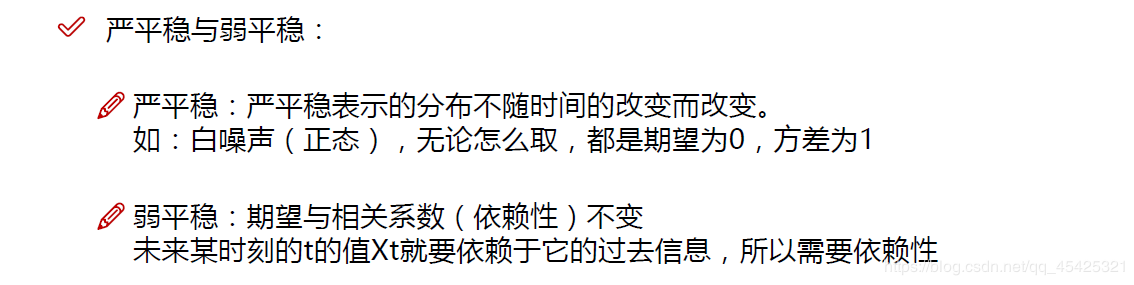

# 数据浮动太大，为了让数据变得稳定采用：差分法，二阶差分就是对一阶差分做差分。

In [23]:
from __future__ import absolute_import, division, print_function

import sys
import os
import pandas as pd
import numpy as np

# TSA from Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

# 绘图
import matplotlib.pylab as plt
import seaborn as sns
#一些参数风格设置
pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
sns.set(style='ticks', context='poster')

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

             UMCSENT
DATE                
2000-01-01 112.00000
2000-02-01 111.30000
2000-03-01 107.10000
2000-04-01 109.20000
2000-05-01 110.70000


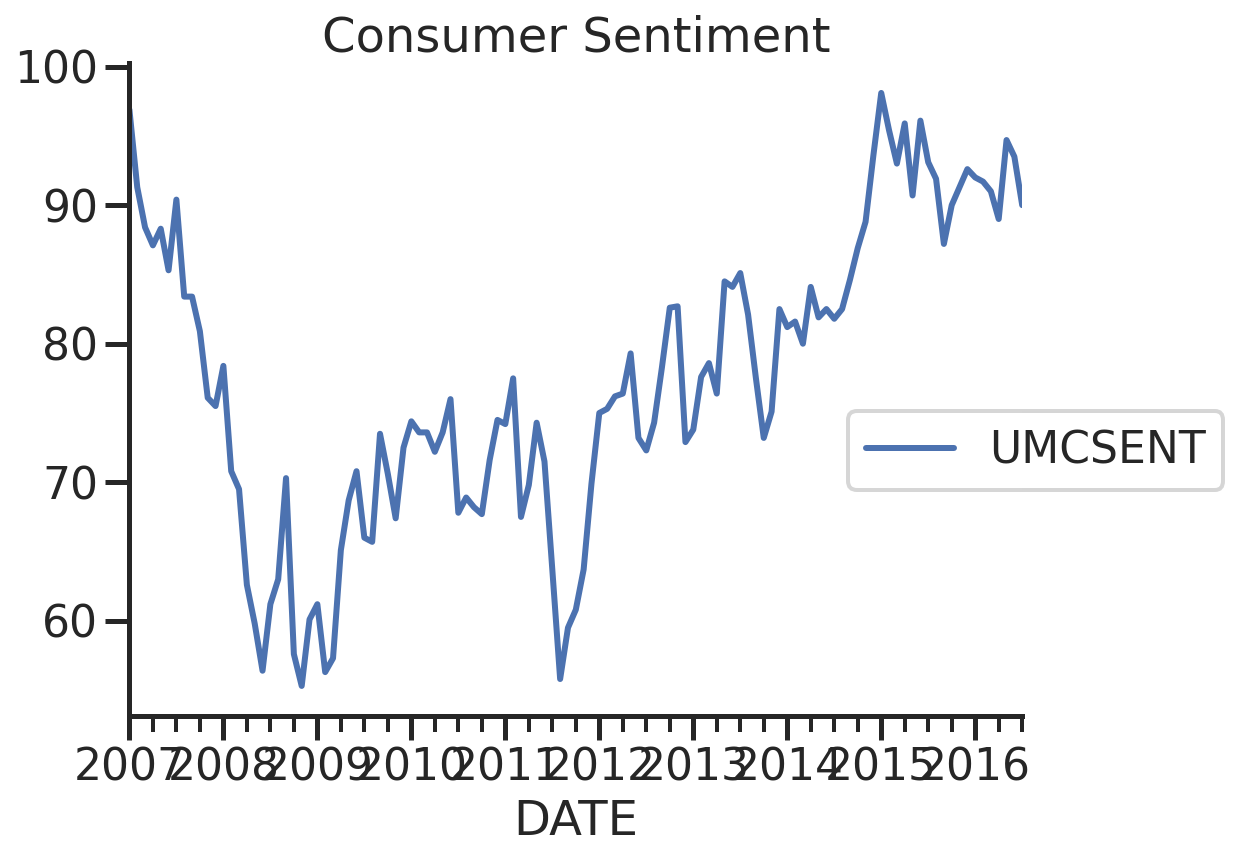

In [24]:
#数据读取
Sentiment = pd.read_csv('sentiment.csv',index_col=0, parse_dates=[0])
print(Sentiment.head())
#切分为测试数据和训练数据
n_sample = Sentiment.shape[0]
n_train = int(0.95 * n_sample)+1
n_forecast = n_sample - n_train
ts_train = Sentiment.iloc[:n_train]['UMCSENT']
ts_test = Sentiment.iloc[:n_forecast]['UMCSENT']
#截取10年数据并展示
sentiment_short = Sentiment.loc['2007':'2017']
sentiment_short.plot(figsize = (8,6))
plt.title("Consumer Sentiment")
plt.legend(bbox_to_anchor = (1.25,0.5))
sns.despine()
plt.show()


            UMCSENT   diff_1  diff_2
DATE                                
2007-01-01 96.90000      nan     nan
2007-02-01 91.30000 -5.60000     nan
2007-03-01 88.40000 -2.90000 2.70000
2007-04-01 87.10000 -1.30000 1.60000
2007-05-01 88.30000  1.20000 2.50000


/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>], dtype=object)

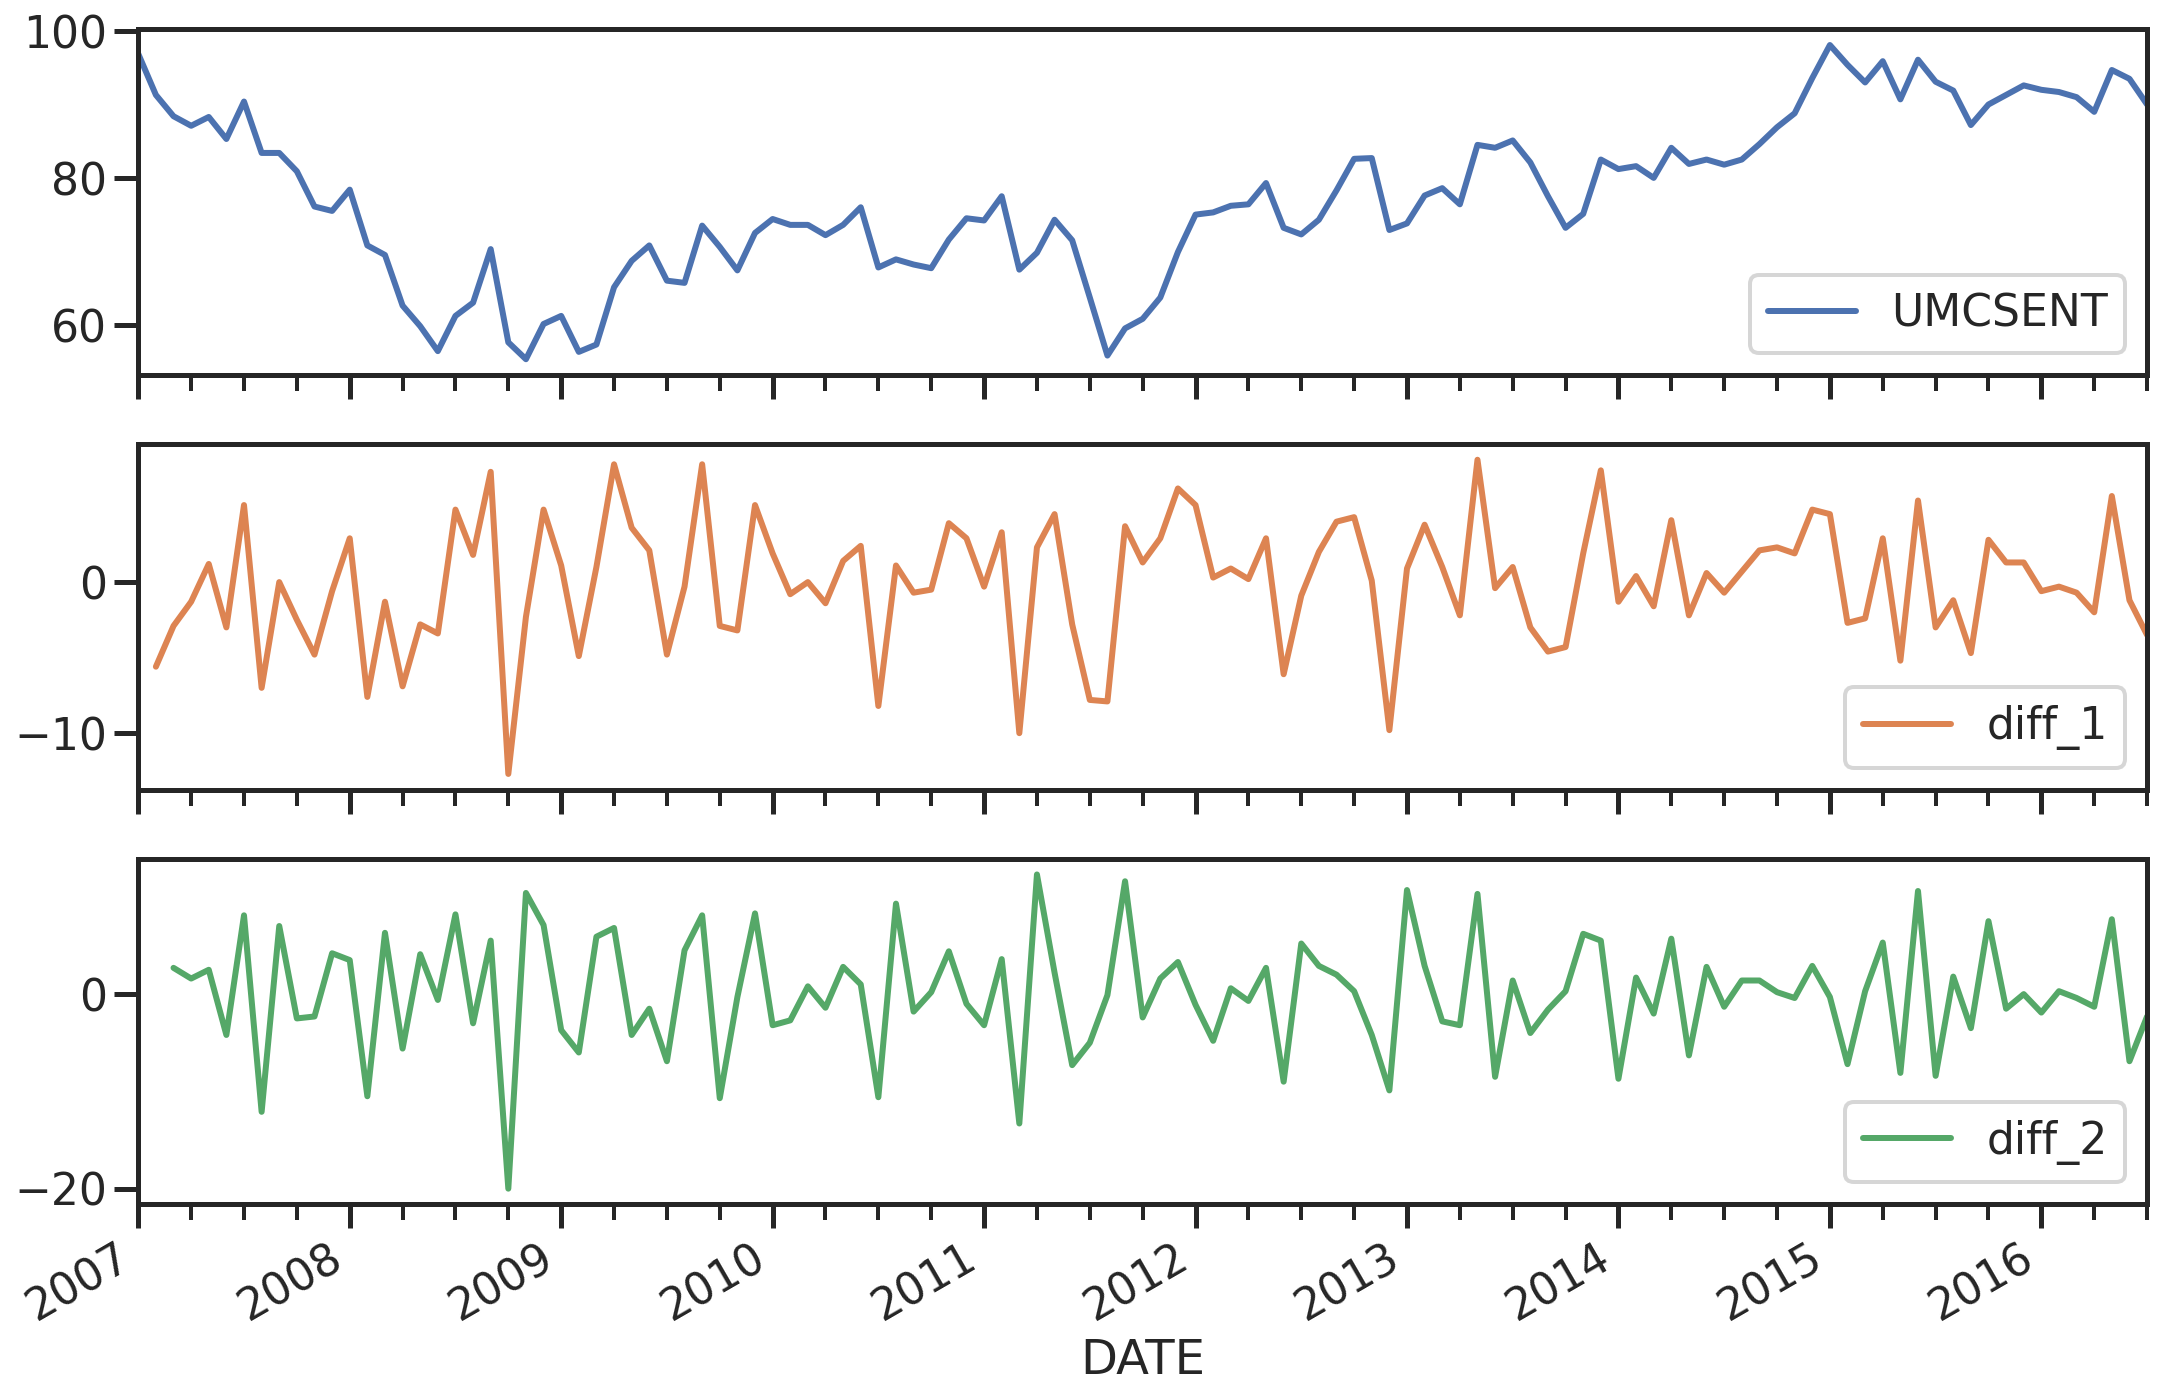

In [25]:
#一阶差分
sentiment_short['diff_1'] = sentiment_short['UMCSENT'].diff(1)
#二阶差分
sentiment_short['diff_2'] = sentiment_short['diff_1'].diff(1)
print(sentiment_short.head())
sentiment_short.plot(subplots=True, figsize=(18, 12))


In [26]:
del sentiment_short['diff_2']
del sentiment_short['diff_1']
print(sentiment_short.head())
print (type(sentiment_short))

            UMCSENT
DATE               
2007-01-01 96.90000
2007-02-01 91.30000
2007-03-01 88.40000
2007-04-01 87.10000
2007-05-01 88.30000
<class 'pandas.core.frame.DataFrame'>


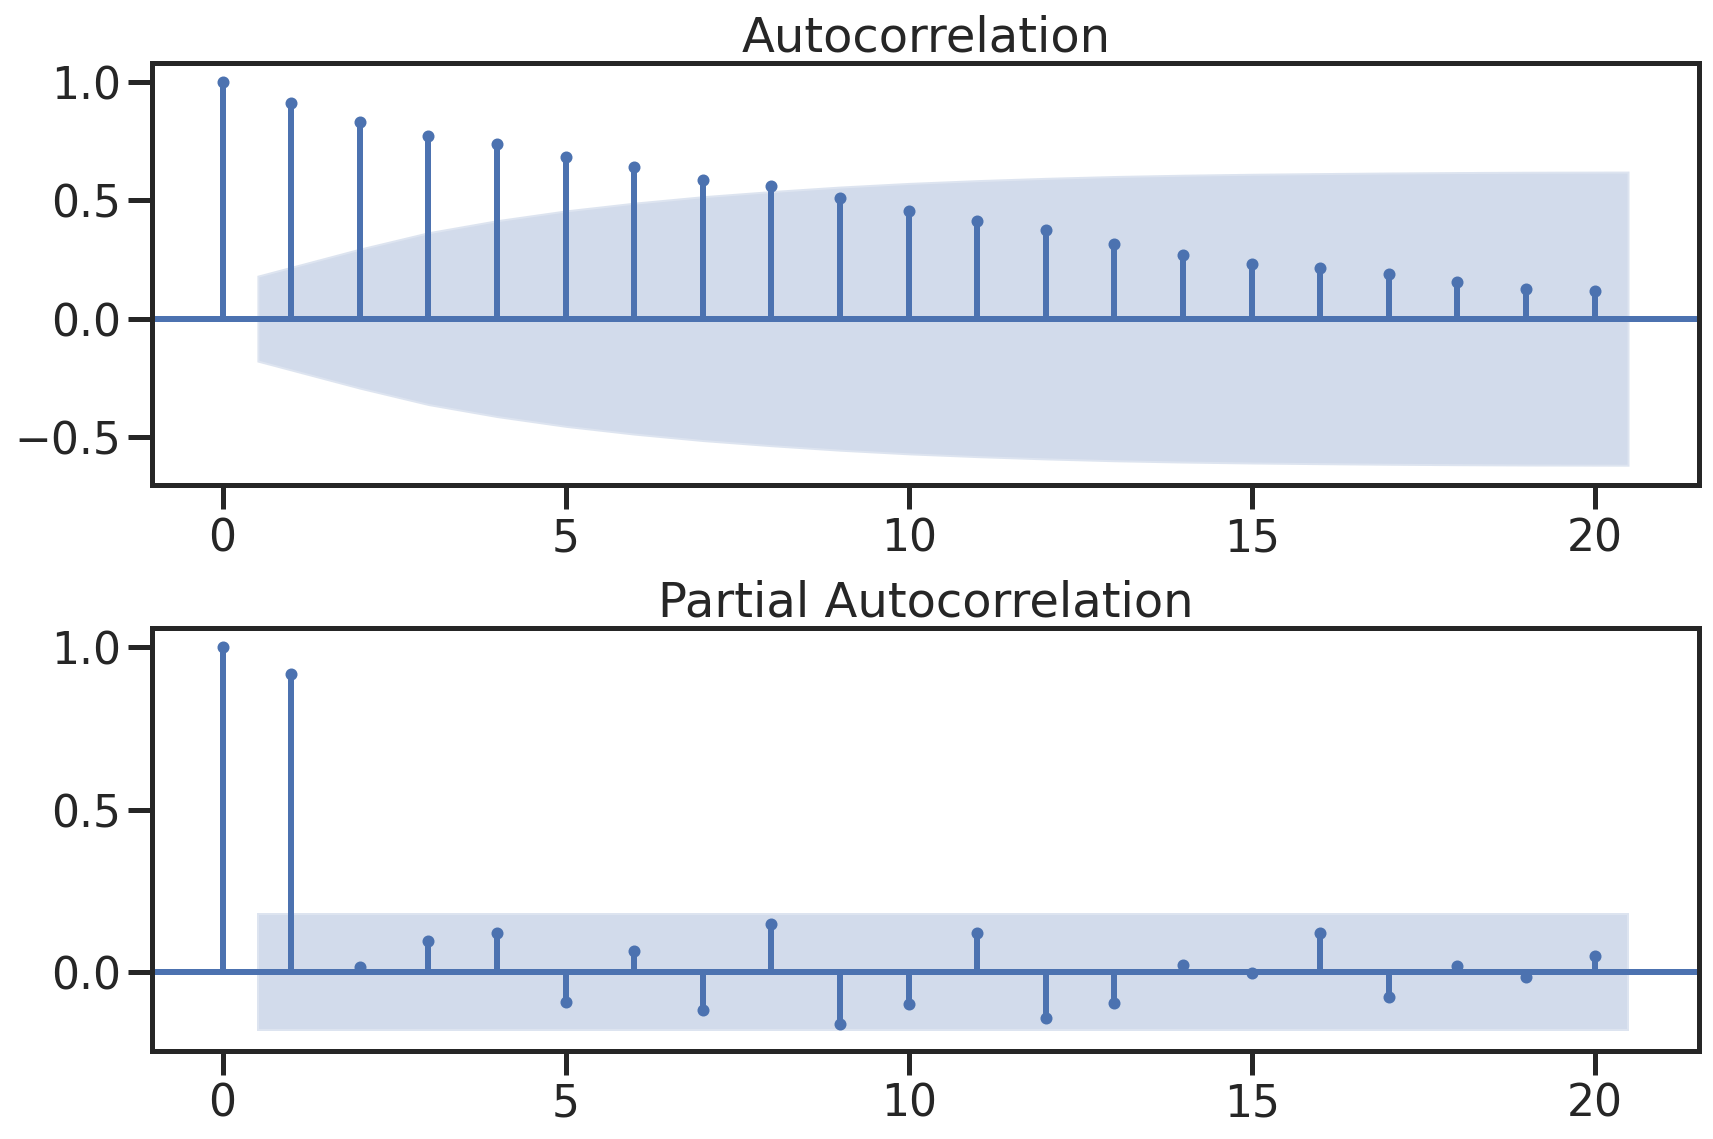

In [27]:
fig = plt.figure(figsize=(12,8))
#画ACF
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sentiment_short, lags=20,ax=ax1)#lags表示滞后的阶数
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();
#画PACF
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sentiment_short, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

In [28]:
def tsplot(y, lags=None, title='', figsize=(14, 8)):

    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax


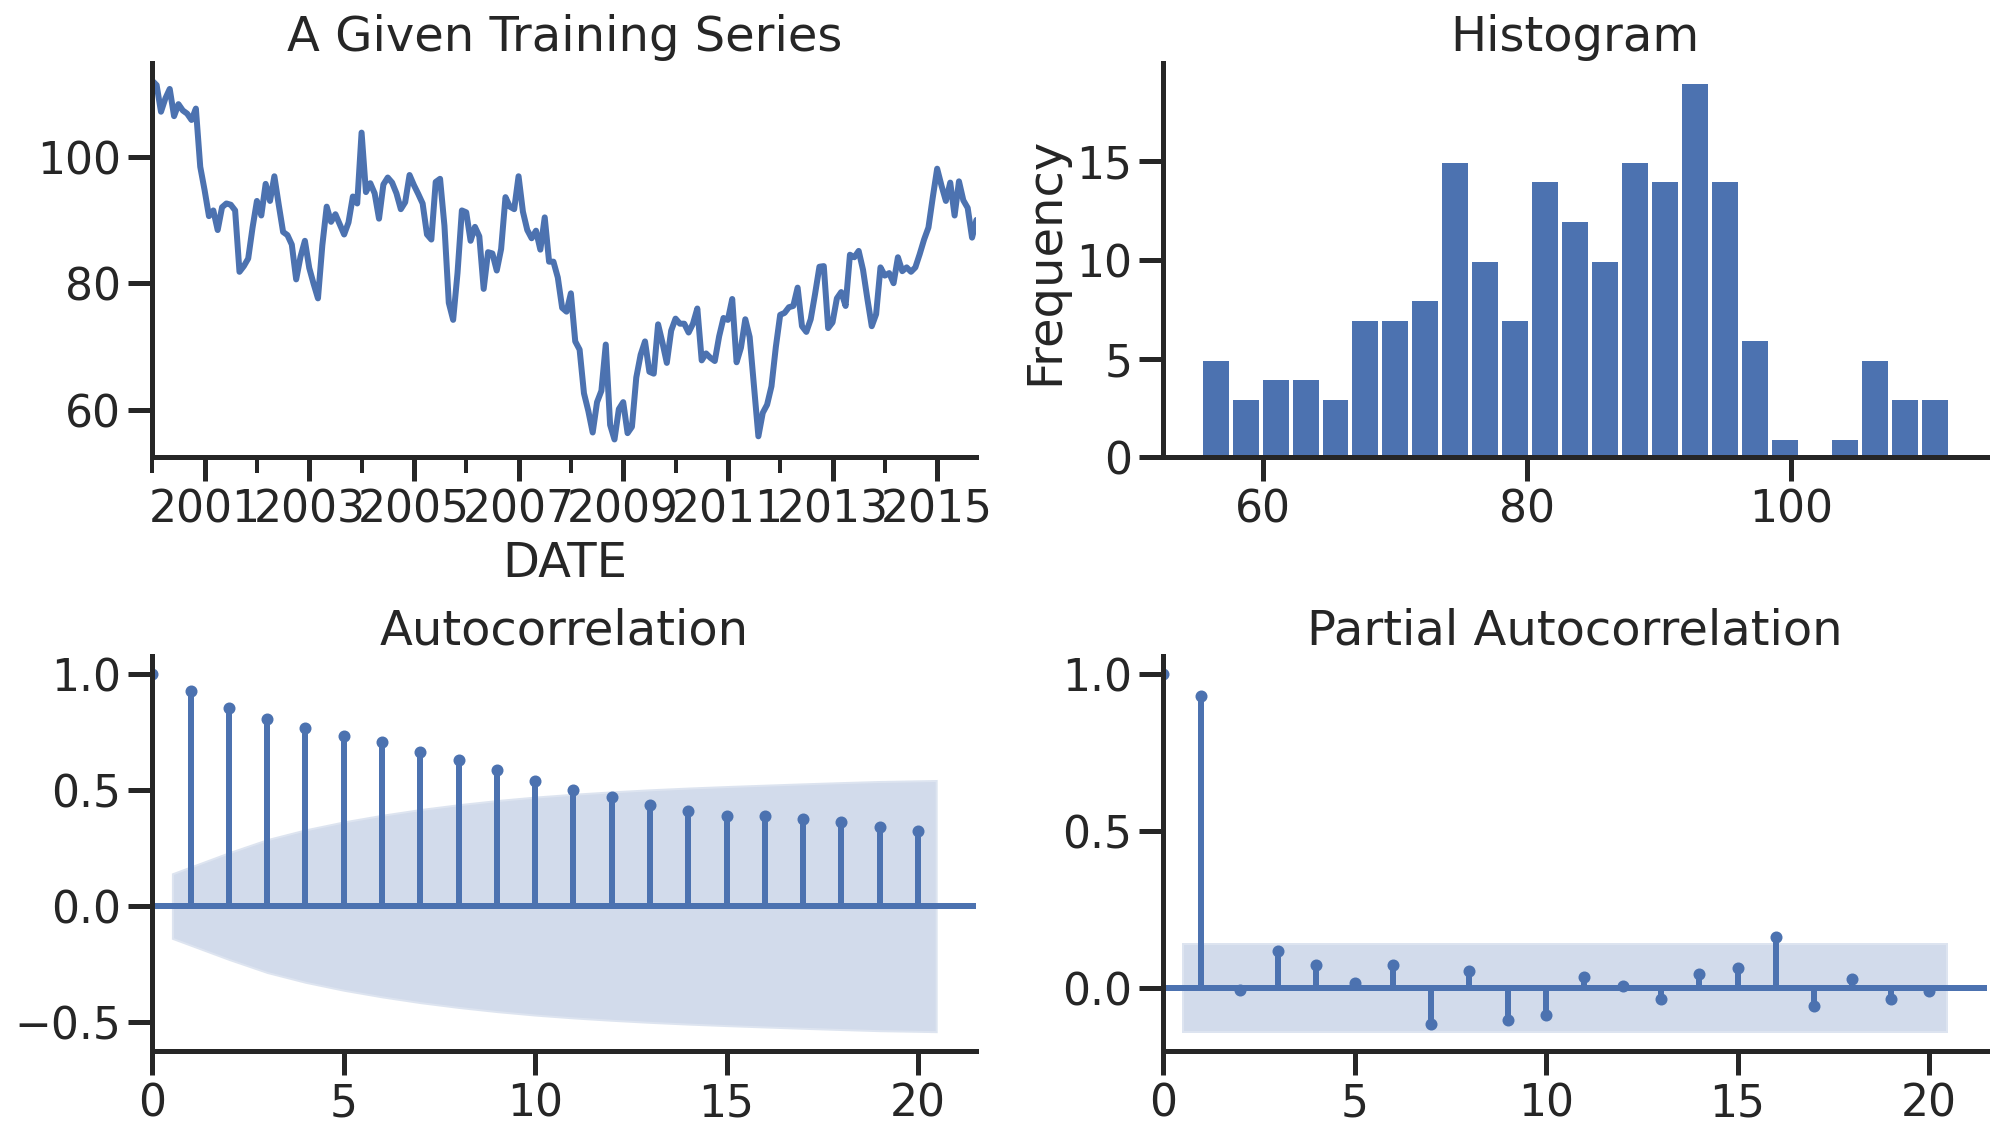

In [29]:
tsplot(ts_train, title='A Given Training Series', lags=20);

In [30]:
arima200 = sm.tsa.SARIMAX(ts_train, order=(2,0,0))
model_results = arima200.fit()
#遍历，寻找适宜的参数
import itertools
 
p_min = 0
d_min = 0
q_min = 0
p_max = 4
d_max = 0
q_max = 4
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(ts_train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float) 


/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: V

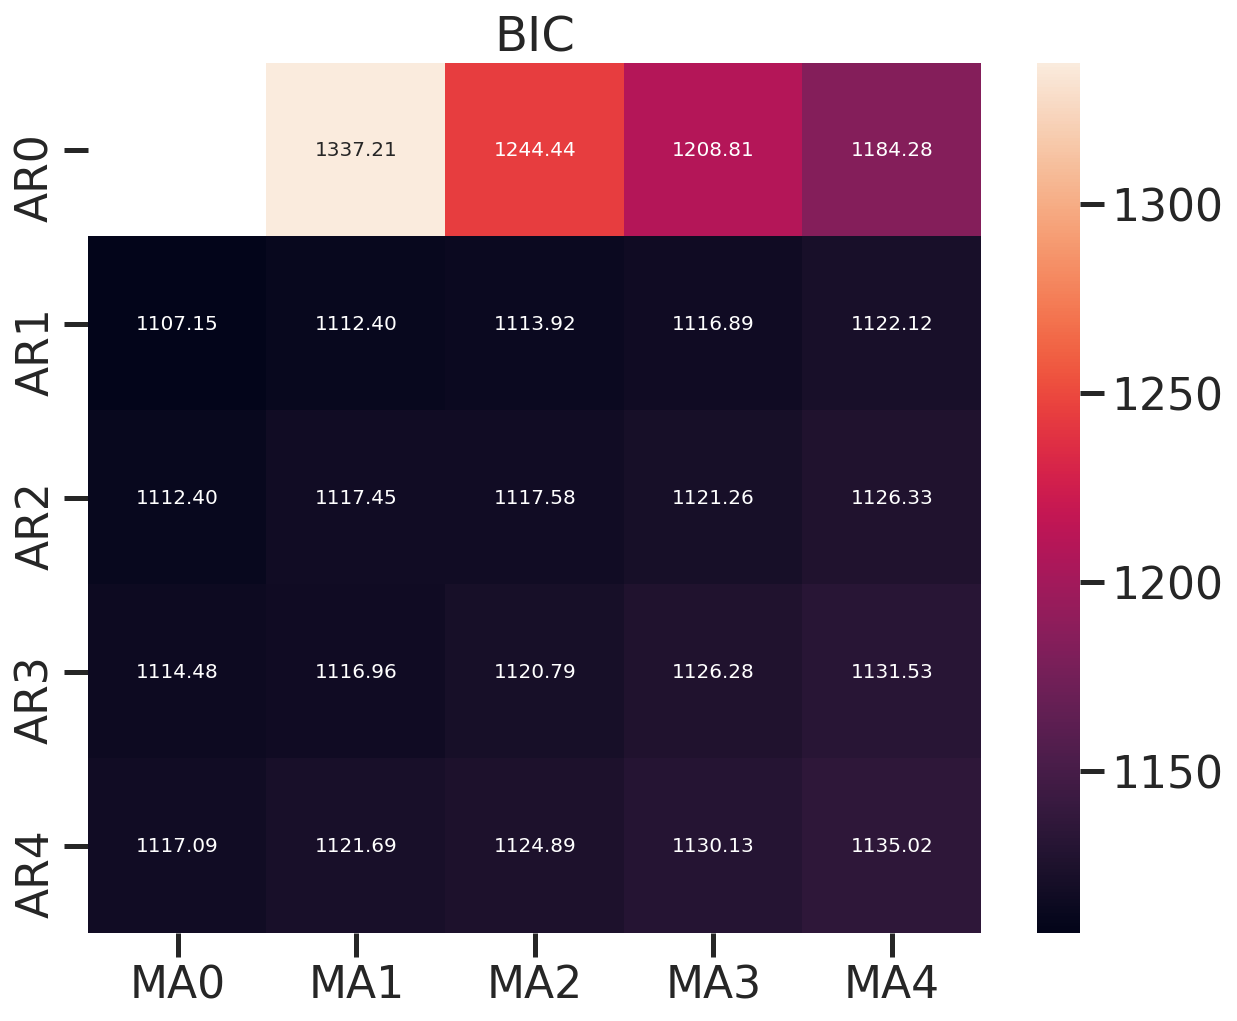

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [32]:
train_results = sm.tsa.arma_order_select_ic(ts_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


AIC (4, 3)
BIC (1, 0)


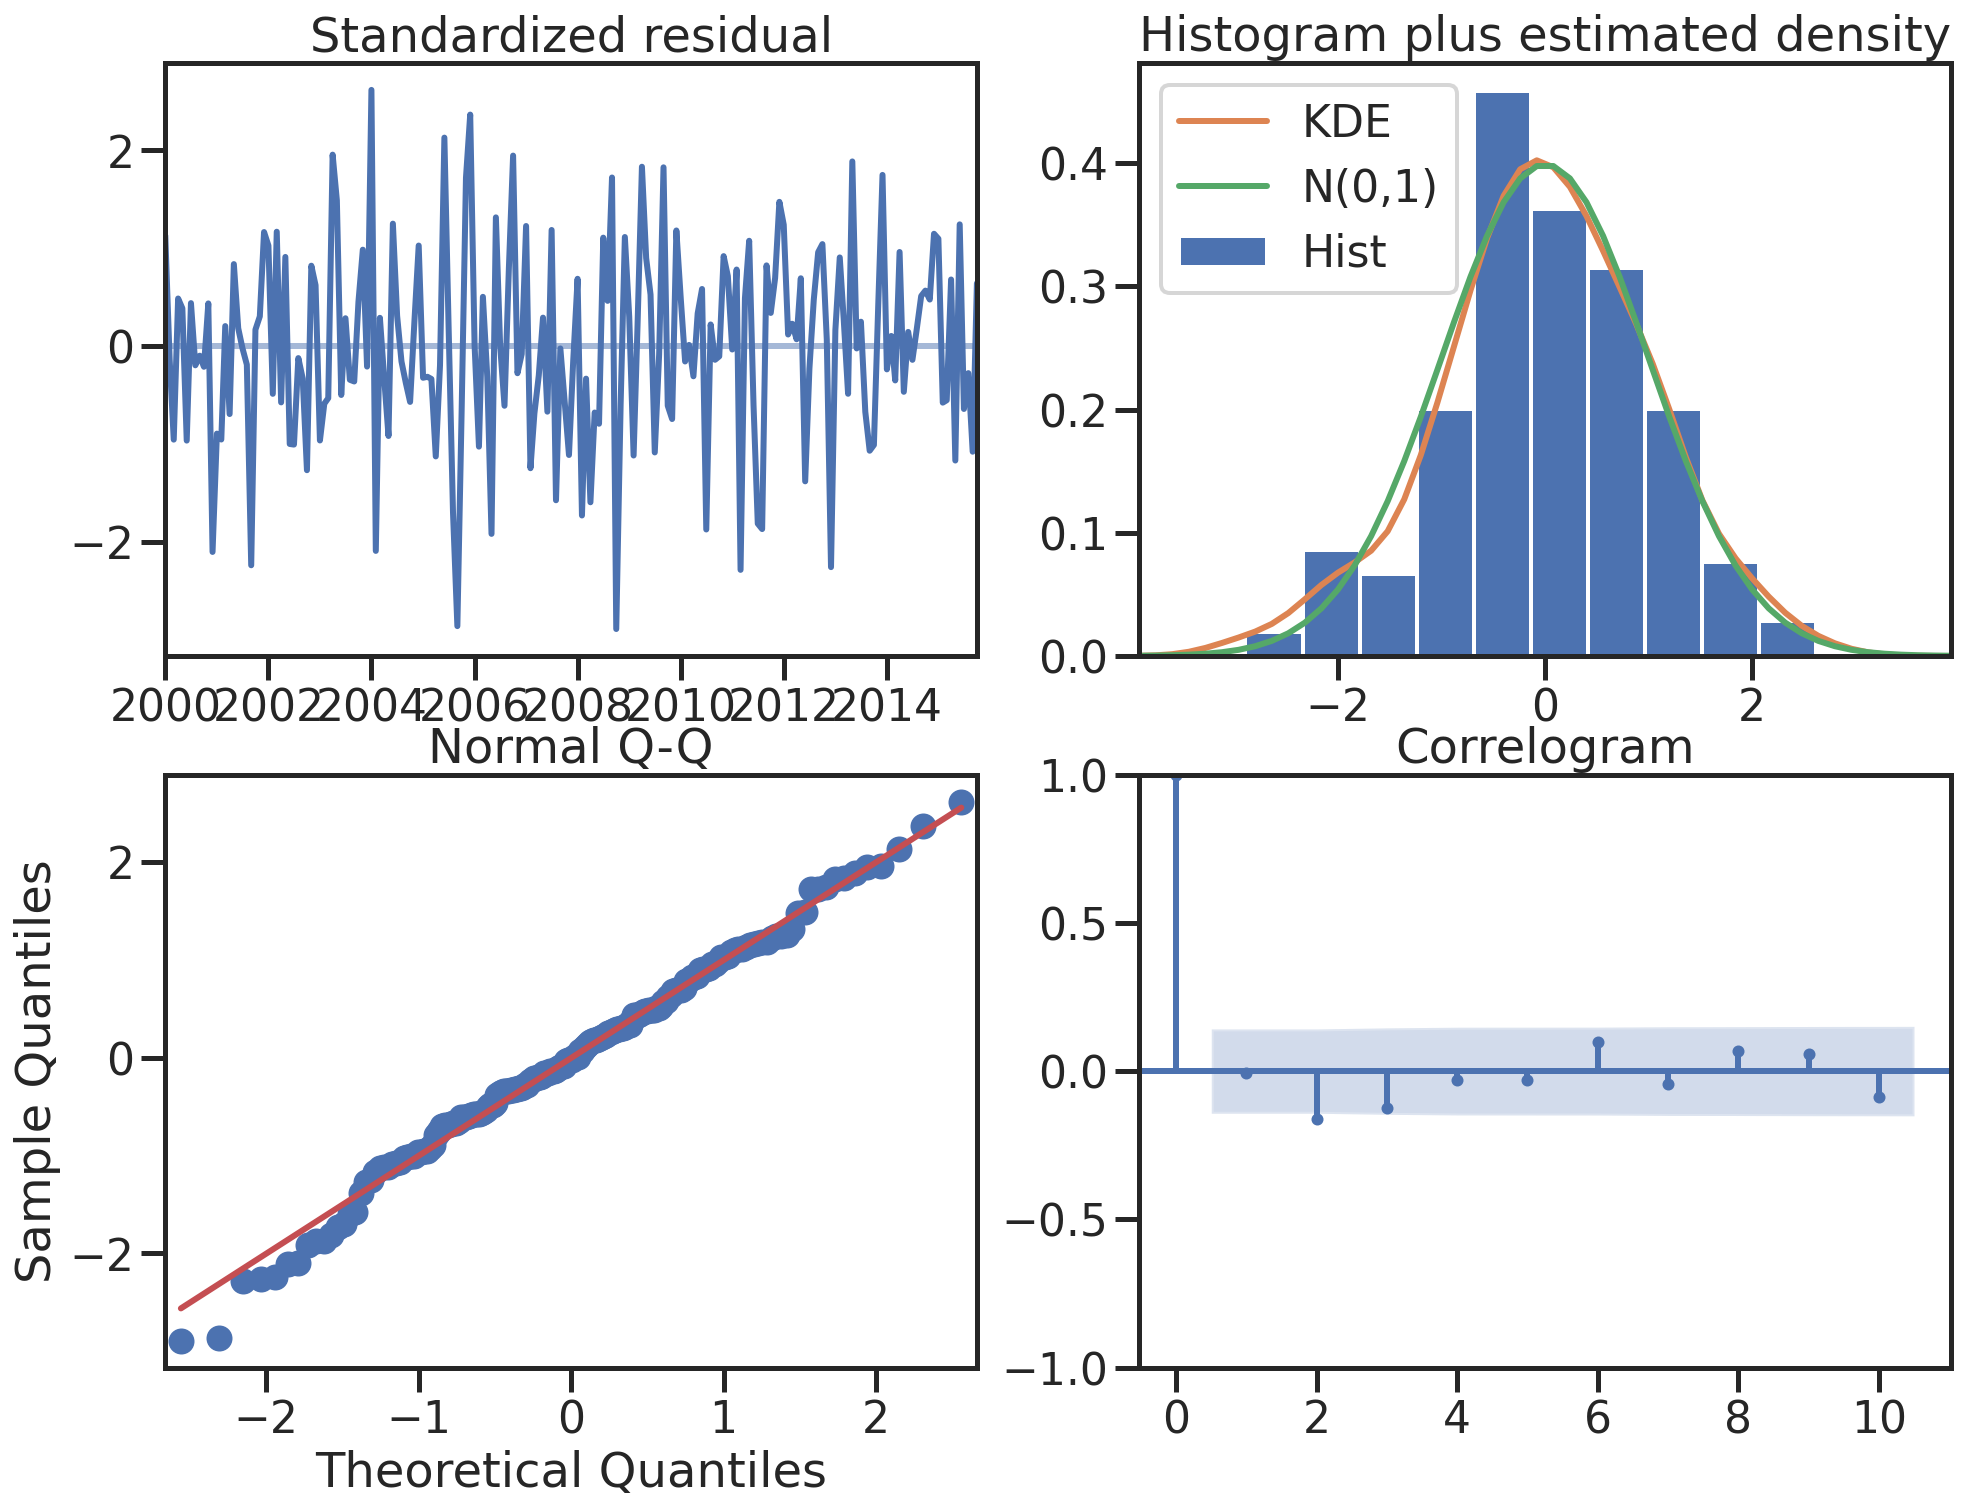

In [33]:
model_results.plot_diagnostics(figsize=(16, 12));

In [34]:
## cpp
train = pd.read_csv('train_1.csv').fillna(0)
train.head()


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.00000,11.00000,5.00000,13.00000,14.00000,9.00000,9.00000,22.00000,26.00000,24.00000,19.00000,10.00000,14.00000,15.00000,8.00000,16.00000,8.00000,8.00000,16.00000,7.00000,11.00000,10.00000,20.00000,18.00000,15.00000,14.00000,49.00000,10.00000,16.00000,18.00000,8.00000,5.00000,9.00000,7.00000,13.00000,9.00000,7.00000,4.00000,11.00000,10.00000,5.00000,9.00000,9.00000,9.00000,9.00000,13.00000,4.00000,15.00000,25.00000,...,13.00000,8.00000,15.00000,14.00000,12.00000,6.00000,11.00000,10.00000,42.00000,21.00000,24.00000,14.00000,11.00000,204.00000,14.00000,45.00000,33.00000,28.00000,18.00000,14.00000,47.00000,15.00000,14.00000,18.00000,20.00000,14.00000,16.00000,14.00000,20.00000,60.00000,22.00000,15.00000,17.00000,19.00000,18.00000,21.00000,21.00000,47.00000,65.00000,17.00000,32.00000,63.00000,15.00000,26.00000,14.00000,20.00000,22.00000,19.00000,18.00000,20.00000
1,2PM_zh.wikipedia.org_all-access_spider,11.00000,14.00000,15.00000,18.00000,11.00000,13.00000,22.00000,11.00000,10.00000,4.00000,41.00000,65.00000,57.00000,38.00000,20.00000,62.00000,44.00000,15.00000,10.00000,47.00000,24.00000,17.00000,22.00000,9.00000,39.00000,13.00000,11.00000,12.00000,21.00000,19.00000,9.00000,15.00000,33.00000,8.00000,8.00000,7.00000,13.00000,2.00000,23.00000,12.00000,27.00000,27.00000,36.00000,23.00000,58.00000,80.00000,60.00000,69.00000,42.00000,...,12.00000,11.00000,14.00000,28.00000,23.00000,20.00000,9.00000,12.00000,11.00000,14.00000,14.00000,15.00000,15.00000,11.00000,20.00000,13.00000,19.00000,621.00000,57.00000,17.00000,23.00000,19.00000,21.00000,47.00000,28.00000,22.00000,22.00000,65.00000,27.00000,17.00000,17.00000,13.00000,9.00000,18.00000,22.00000,17.00000,15.00000,22.00000,23.00000,19.00000,17.00000,42.00000,28.00000,15.00000,9.00000,30.00000,52.00000,45.00000,26.00000,20.00000
2,3C_zh.wikipedia.org_all-access_spider,1.00000,0.00000,1.00000,1.00000,0.00000,4.00000,0.00000,3.00000,4.00000,4.00000,1.00000,1.00000,1.00000,6.00000,8.00000,6.00000,4.00000,5.00000,1.00000,2.00000,3.00000,8.00000,8.00000,6.00000,6.00000,2.00000,2.00000,3.00000,2.00000,4.00000,3.00000,3.00000,5.00000,3.00000,5.00000,4.00000,2.00000,5.00000,1.00000,4.00000,5.00000,0.00000,0.00000,7.00000,3.00000,5.00000,1.00000,6.00000,2.00000,...,6.00000,4.00000,2.00000,4.00000,6.00000,5.00000,4.00000,4.00000,3.00000,3.00000,9.00000,3.00000,5.00000,4.00000,0.00000,1.00000,4.00000,5.00000,8.00000,8.00000,1.00000,1.00000,2.00000,5.00000,3.00000,3.00000,3.00000,7.00000,3.00000,9.00000,8.00000,3.00000,210.00000,5.00000,4.00000,6.00000,2.00000,2.00000,4.00000,3.00000,3.00000,1.00000,1.00000,7.00000,4.00000,4.00000,6.00000,3.00000,4.00000,17.00000
3,4minute_zh.wikipedia.org_all-access_spider,35.00000,13.00000,10.00000,94.00000,4.00000,26.00000,14.00000,9.00000,11.00000,16.00000,16.00000,11.00000,23.00000,145.00000,14.00000,17.00000,85.00000,4.00000,30.00000,22.00

In [35]:
for col in train.columns[1:]: #循环将每列转换
    train[col] = pd.to_numeric(train[col],downcast='integer')
train.head()


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,24,19,10,14,15,8,16,8,8,16,7,11,10,20,18,15,14,49,10,16,18,8,5,9,7,13,9,7,4,11,10,5,9,9,9,9,13,4,15,25,...,13,8,15,14,12,6,11,10,42,21,24,14,11,204,14,45,33,28,18,14,47,15,14,18,20,14,16,14,20,60,22,15,17,19,18,21,21,47,65,17,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,4,41,65,57,38,20,62,44,15,10,47,24,17,22,9,39,13,11,12,21,19,9,15,33,8,8,7,13,2,23,12,27,27,36,23,58,80,60,69,42,...,12,11,14,28,23,20,9,12,11,14,14,15,15,11,20,13,19,621,57,17,23,19,21,47,28,22,22,65,27,17,17,13,9,18,22,17,15,22,23,19,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,4,1,1,1,6,8,6,4,5,1,2,3,8,8,6,6,2,2,3,2,4,3,3,5,3,5,4,2,5,1,4,5,0,0,7,3,5,1,6,2,...,6,4,2,4,6,5,4,4,3,3,9,3,5,4,0,1,4,5,8,8,1,1,2,5,3,3,3,7,3,9,8,3,210,5,4,6,2,2,4,3,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,16,16,11,23,145,14,17,85,4,30,22,9,10,11,7,7,11,9,11,44,8,14,19,10,17,17,10,7,10,1,8,27,19,16,2,84,22,14,47,25,...,38,13,14,17,26,14,10,9,23,15,7,10,7,10,14,17,11,9,11,5,10,8,17,13,23,40,16,17,41,17,8,9,18,12,12,18,13,18,23,10,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,11,8,6,10,14,6,9,6,16,14,13,15,14,16,9,178,64,12,10,11,6,8,7,9,8,5,11,8,4,15,5,8,8,6,7,15,4,11,7,48,9,25,13,3,11,27,13,36,10


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [37]:
import re
#将page列的标志符号(例如zh)映射为国家
def get_language(page):
#通过下列公式搜索XX.wikipedia.org格式后返回xx
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group()[0:2]
    return 'na'
train['lang']=train.Page.map(get_language)
#统计频次
from collections import Counter
print(Counter(train.lang))


Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [38]:
lang_sets = {} #建立每个语种对应的词条库
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {} #统计每个语种的词条每天平均点击量
for key in lang_sets: #语种所有词条总点击量/词条数
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]


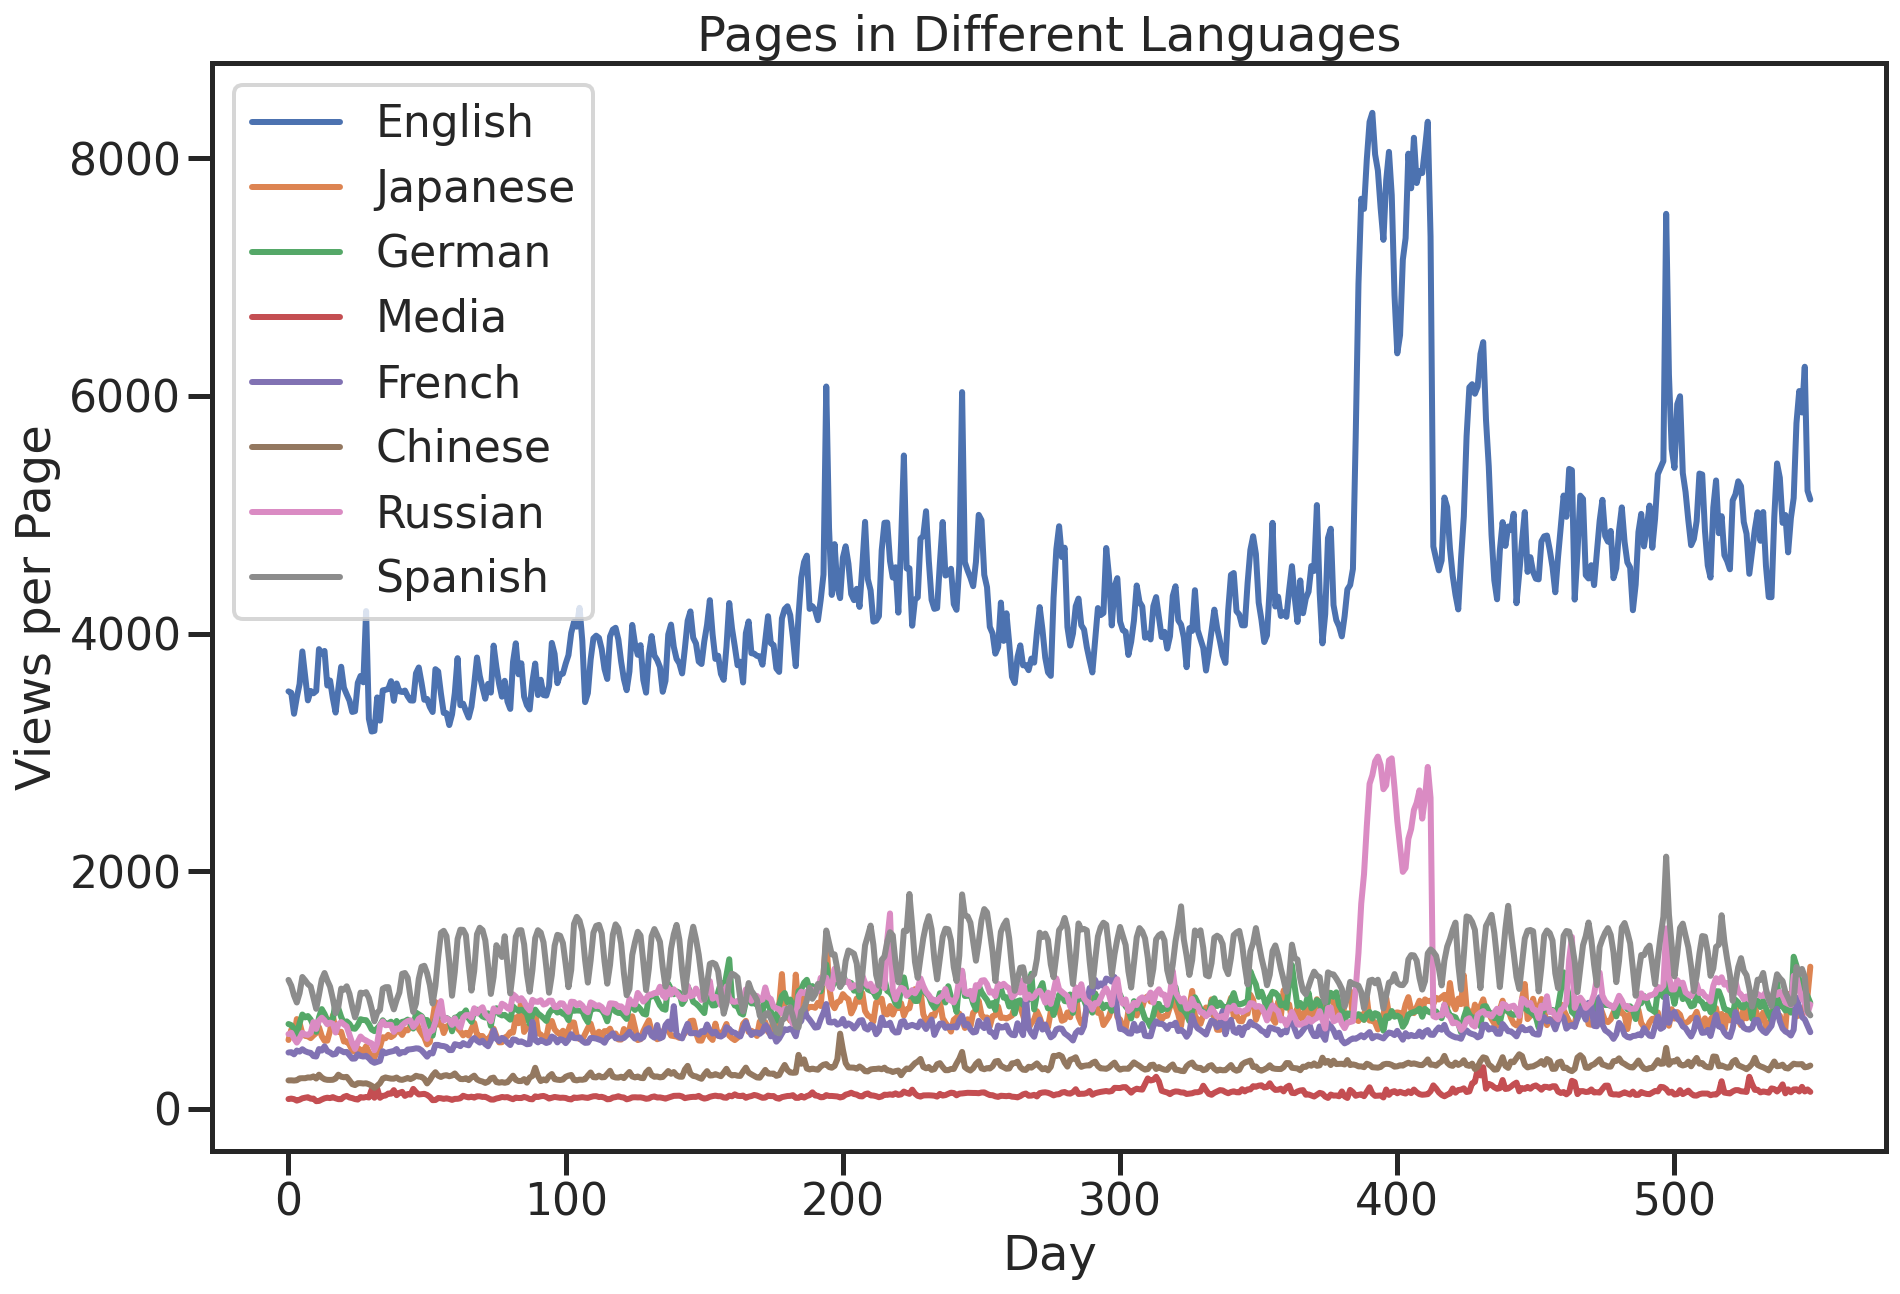

In [39]:
days = [r for r in range(sums['en'].shape[0])]#提取总的天数550

fig = plt.figure(1,figsize=[15,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()


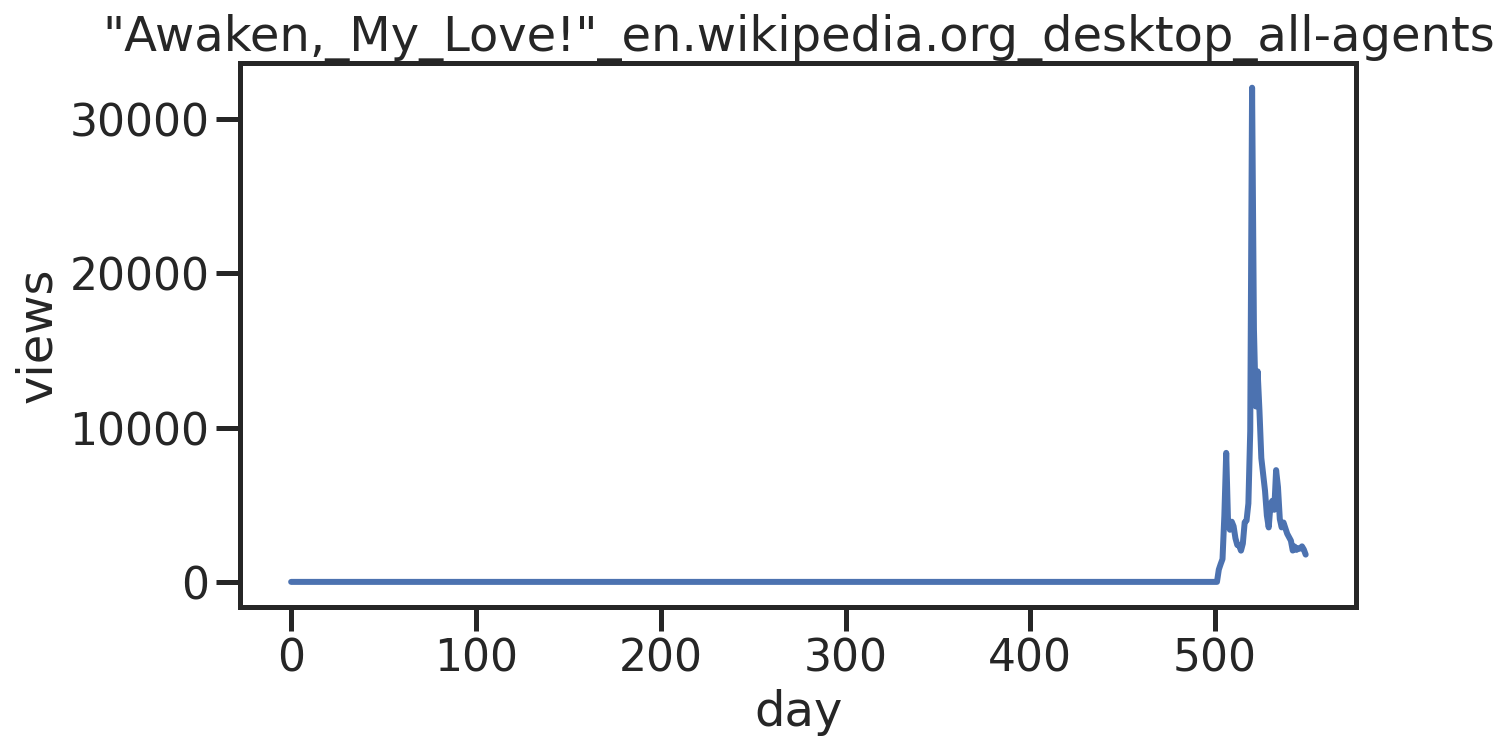

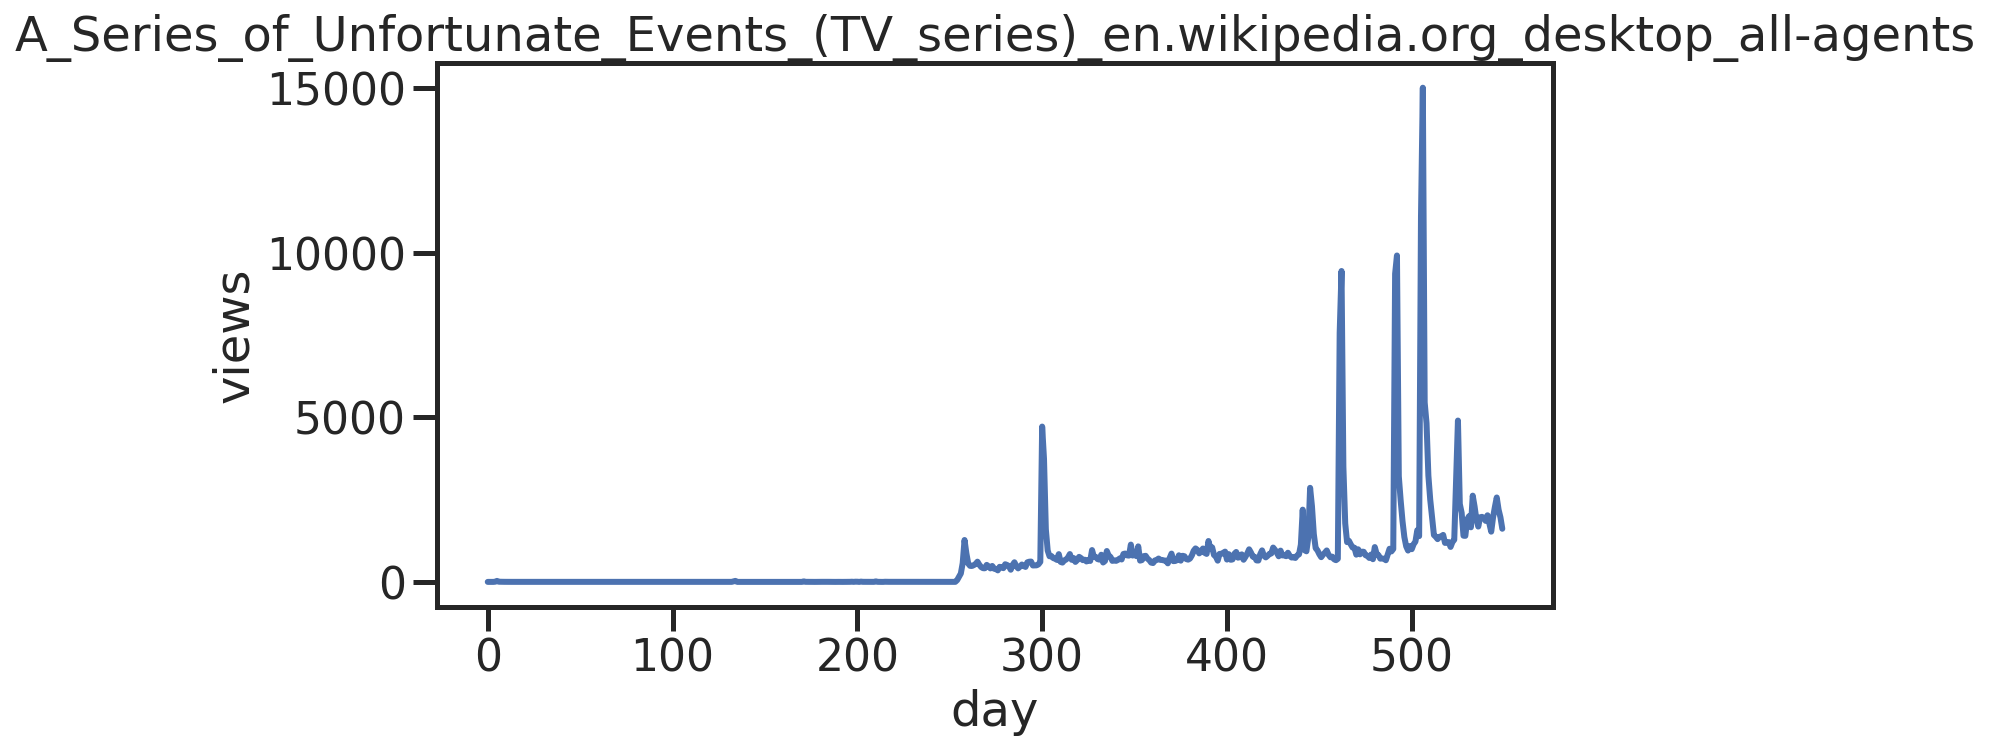

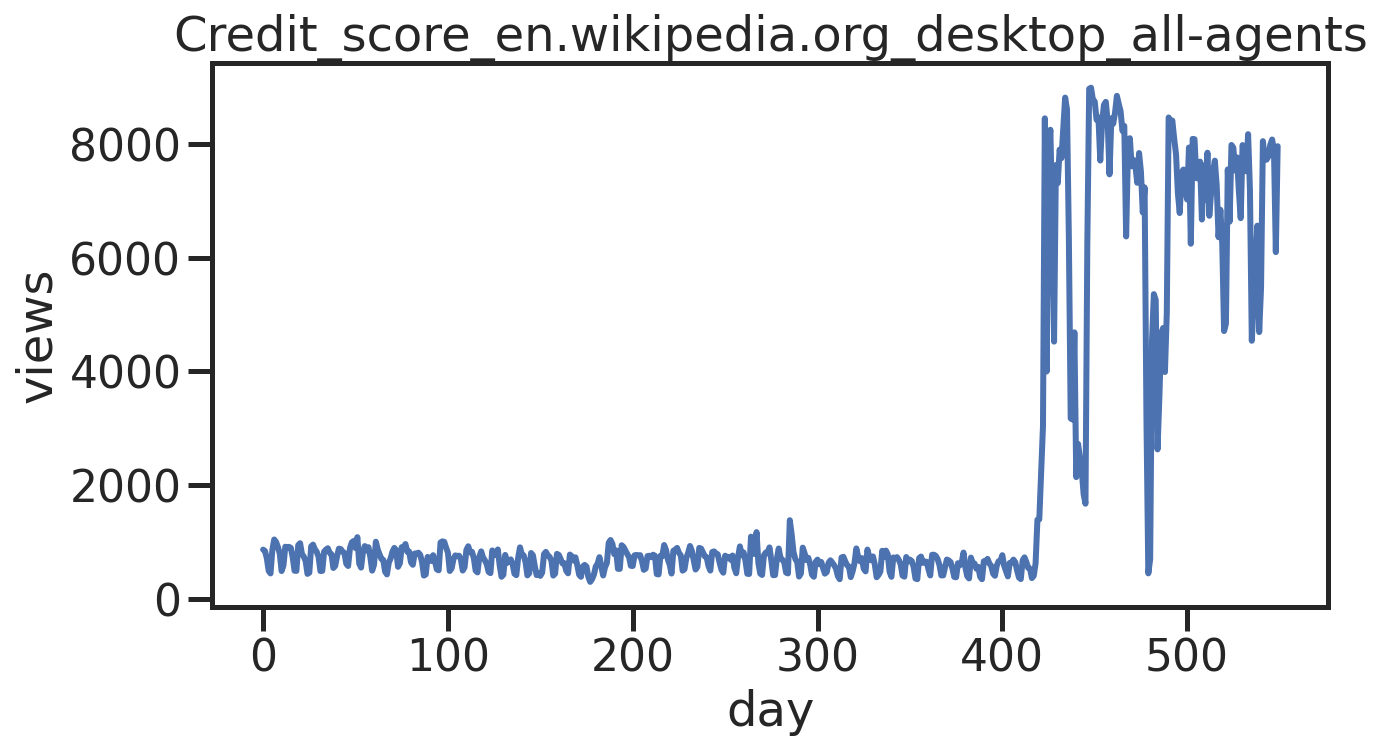

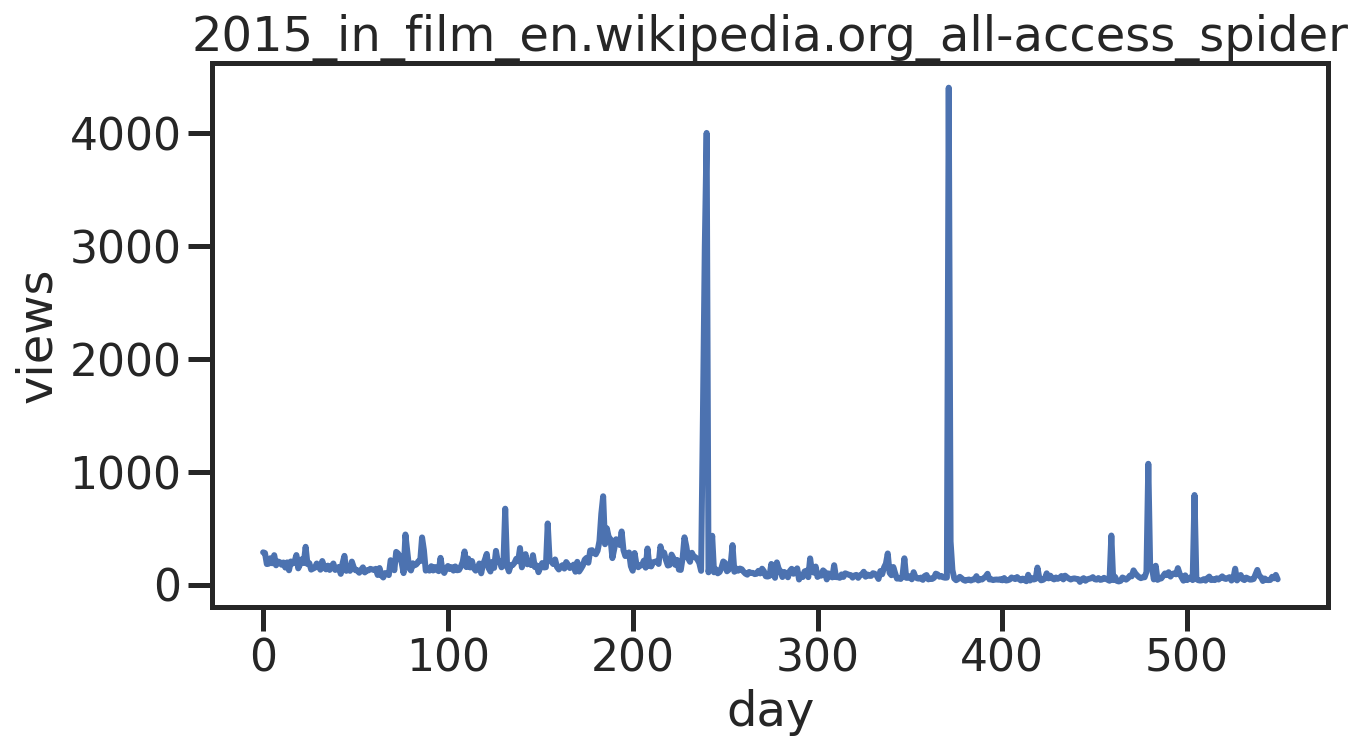

In [40]:
def plot_entry(key,idx):
    data = lang_sets[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    plt.show()
idx = [1,100,500,5000]
for i in idx:
    plot_entry('en',i)

In [41]:
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')


en
                                                    Page        total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  12066181102
9774       Main_Page_en.wikipedia.org_desktop_all-agents   8774497458
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents   3153984882
39180  Special:Search_en.wikipedia.org_all-access_all...   1304079353
10403  Special:Search_en.wikipedia.org_desktop_all-ag...   1011847748
74690  Special:Search_en.wikipedia.org_mobile-web_all...    292162839
39172  Special:Book_en.wikipedia.org_all-access_all-a...    133993144
10399   Special:Book_en.wikipedia.org_desktop_all-agents    133285908
33644       Main_Page_en.wikipedia.org_all-access_spider    129020407
34257  Special:Search_en.wikipedia.org_all-access_spider    124310206



ja
                                                     Page      total
120336      メインページ_ja.wikipedia.org_all-access_all-agents  210753795
86431          メインページ_ja.wikipedia.org_desktop_all-agents  134147415
123025       特

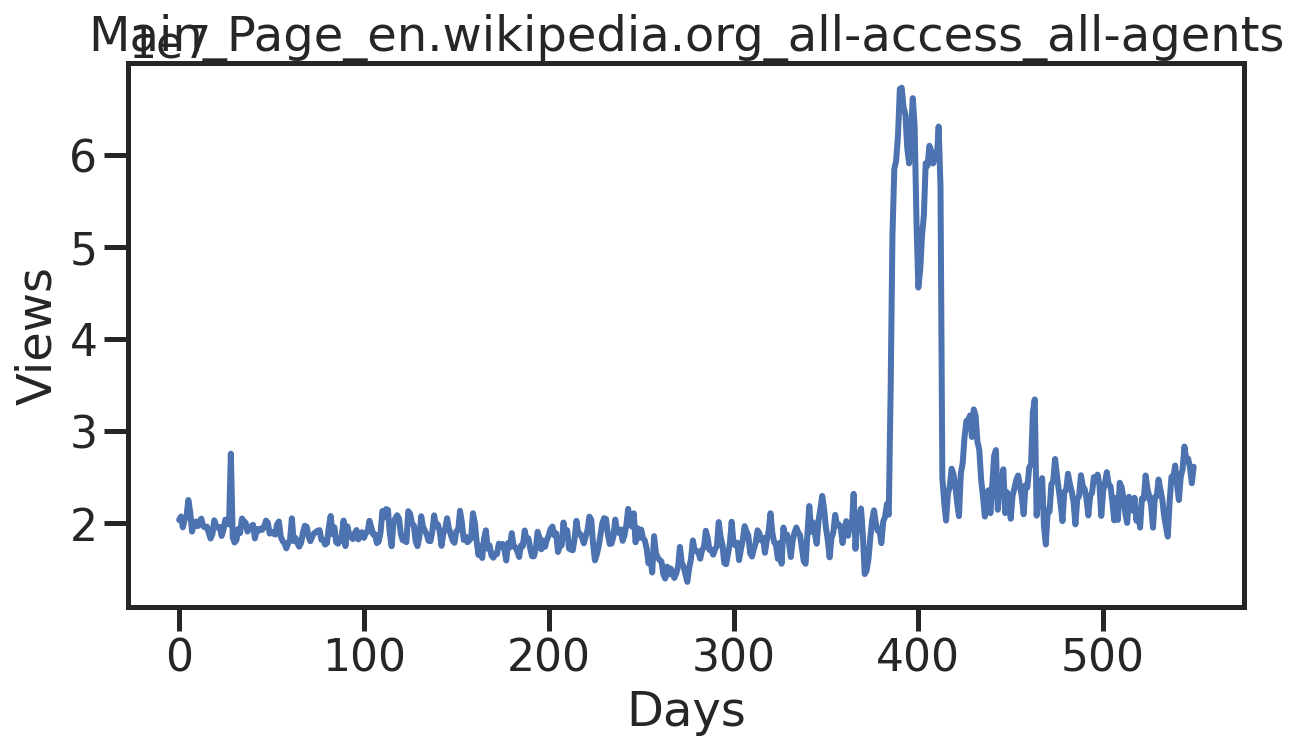

/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)


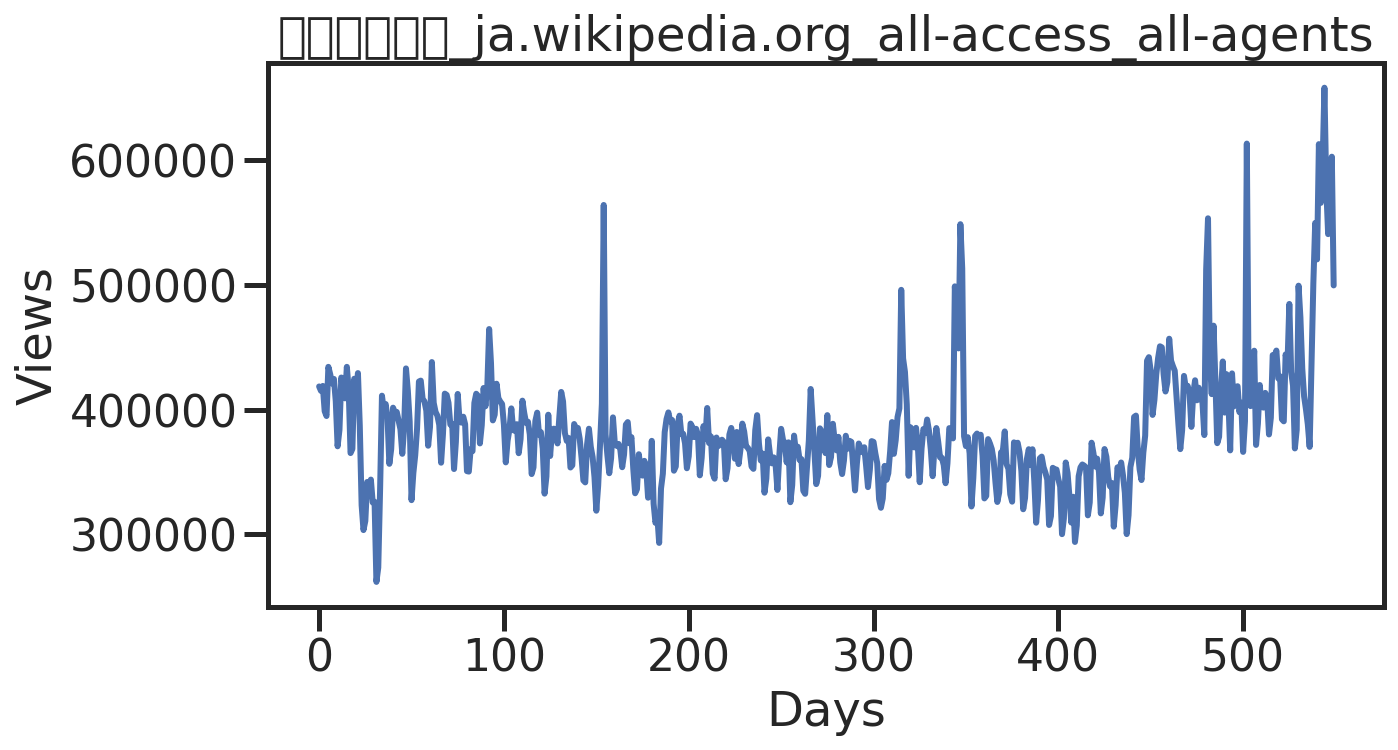

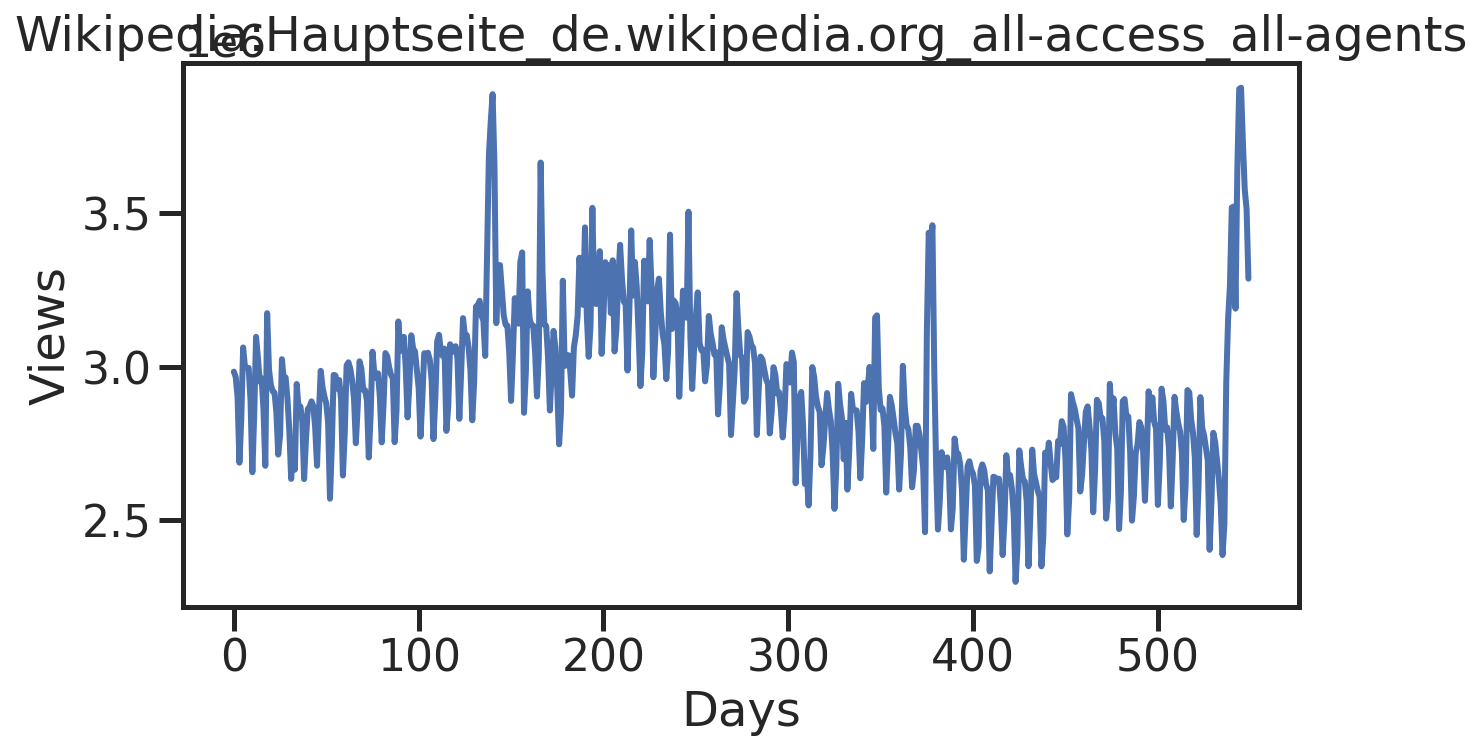

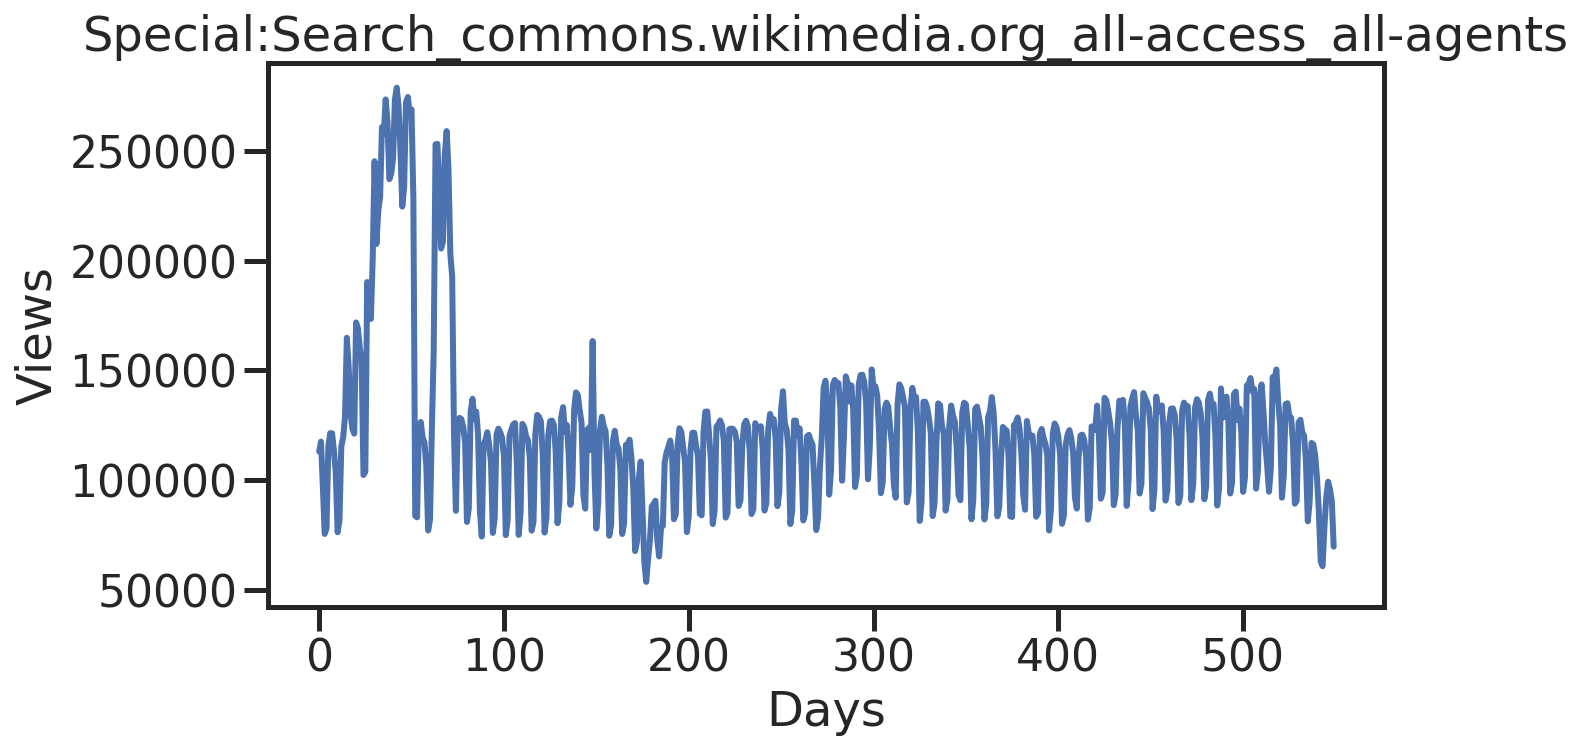

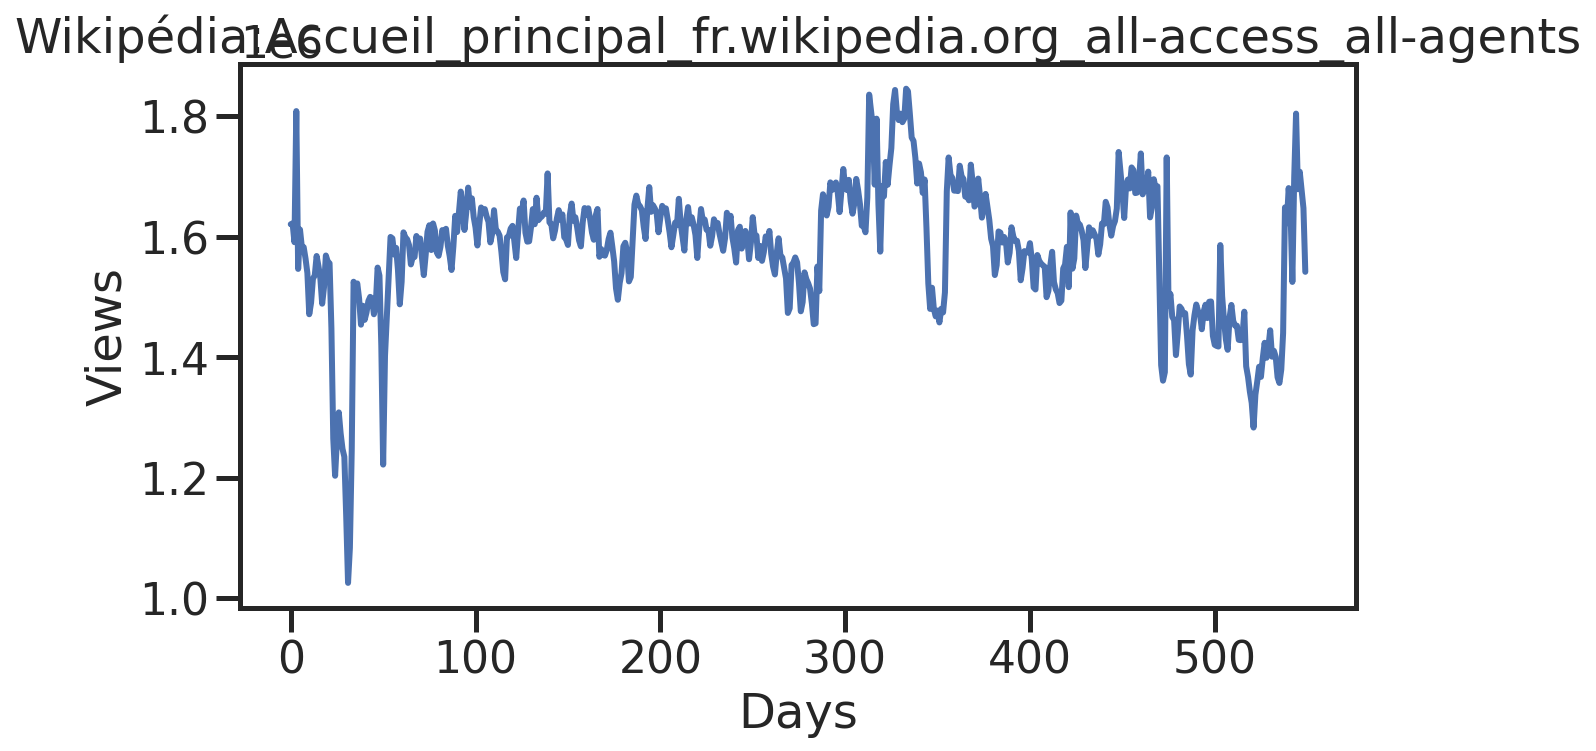

/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/manman/anaconda3/envs/deepintorch/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


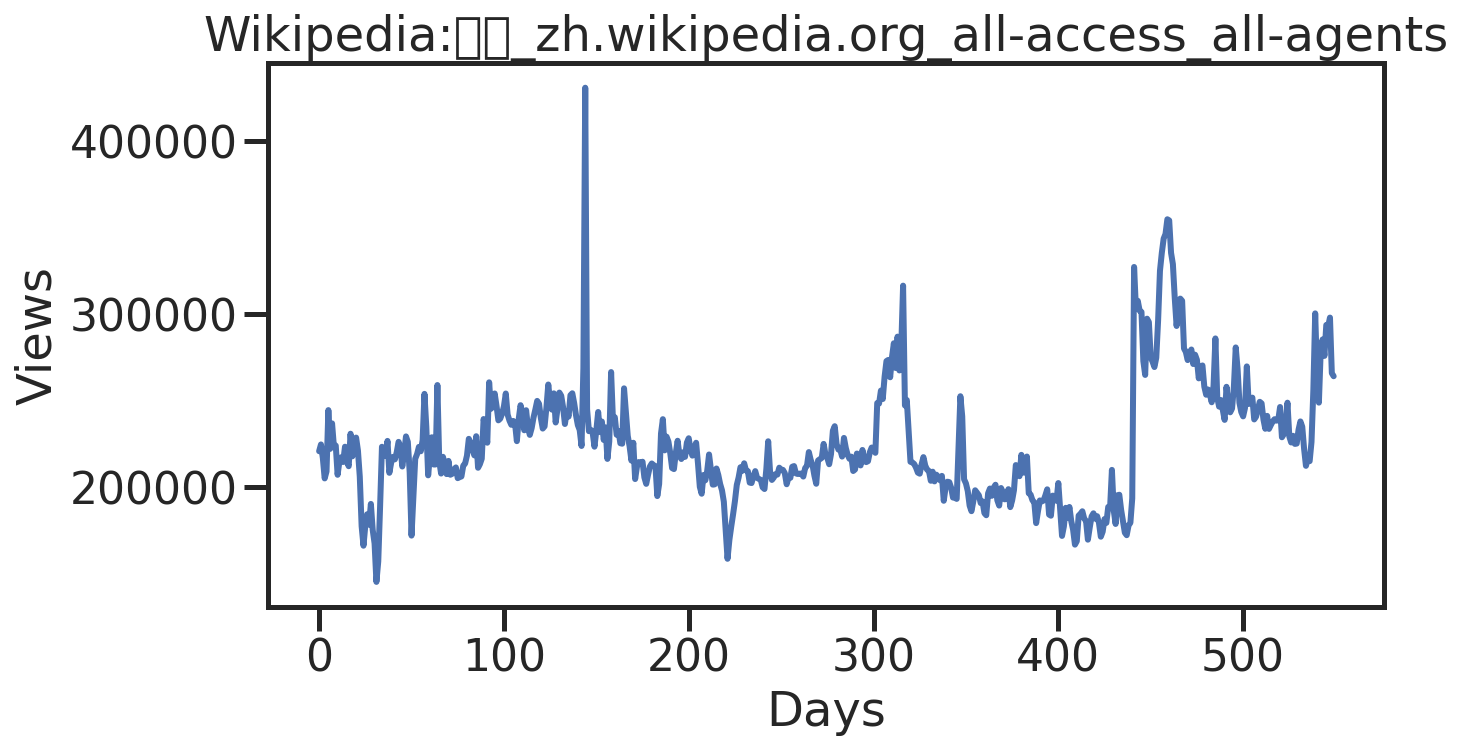

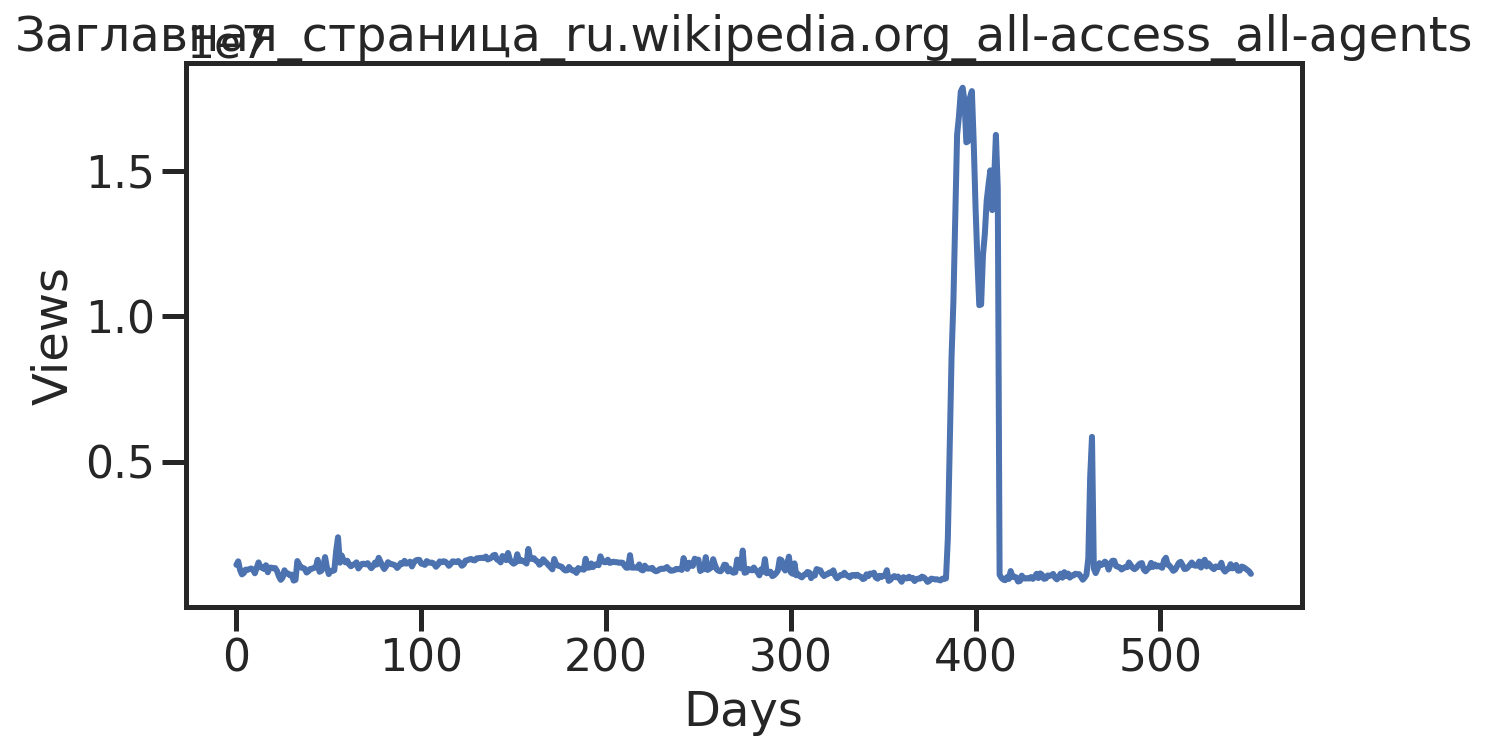

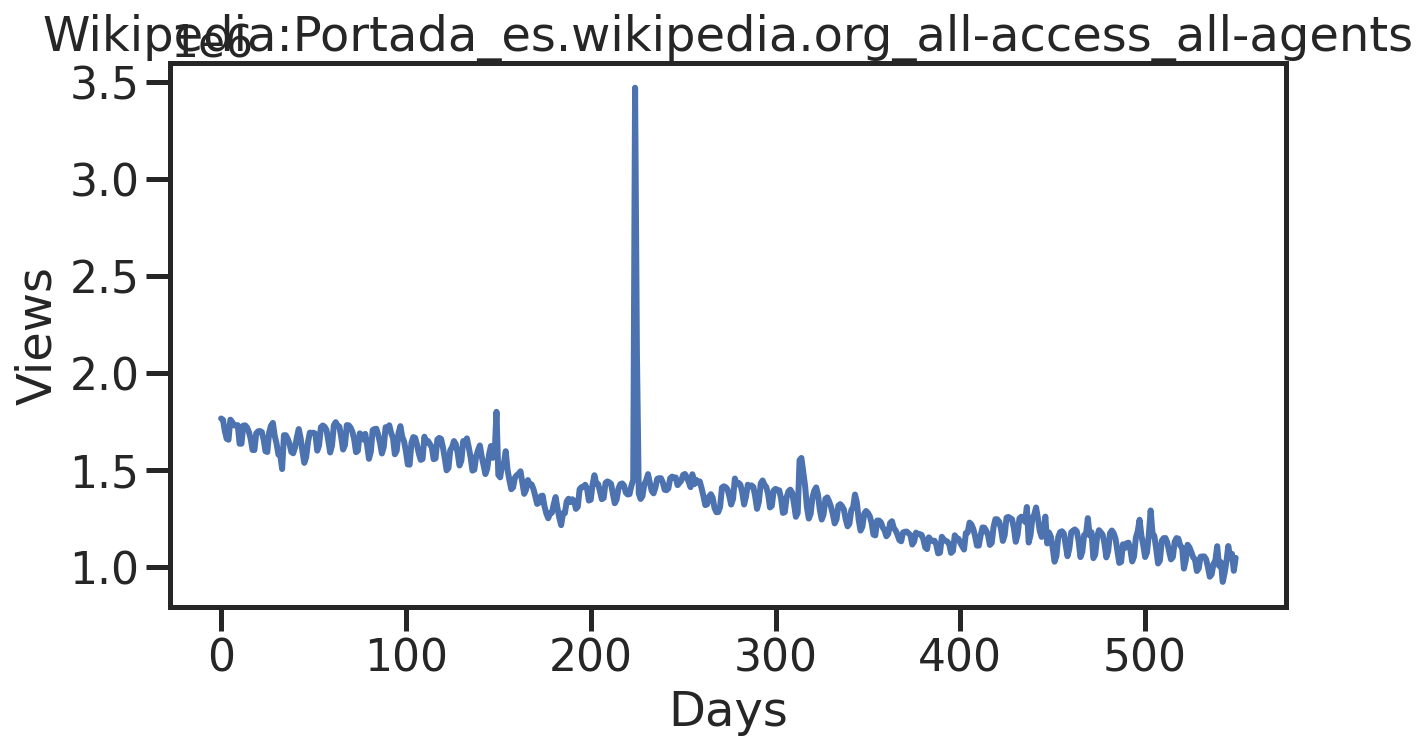

In [42]:
for key in top_pages:
    fig = plt.figure(1,figsize=(10,5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key],cols]
    plt.plot(days,data)
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.show()
